In [93]:
#Header stuff

from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
import getdist

import matplotlib.pyplot as plt
import IPython
import numpy as np
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

%pylab inline

import math as m
import statistics as s
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.integrate import quad

GetDist Version: 1.1.0, Matplotlib version: 3.1.3
Populating the interactive namespace from numpy and matplotlib


/home/kylar/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'fft', 'linalg', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [94]:
def LCDM_thermo_reader(file, delim):

    #base_dir = '../class_ffat2/output/'

    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()

    header_length = 11
    #defining the length of the actual data of the table
    i = len(table)-header_length

    #preallocating the arrays for memory
    z = np.zeros(i)
    t = np.zeros(i)
    x_e = np.zeros(i)
    kappa_dot = np.zeros(i)
    optical = np.zeros(i)
    vis_fun = np.zeros(i)
    baryon_T = np.zeros(i)
    dbaryon_T = np.zeros(i)
    w_b = np.zeros(i)
    c_s_b = np.zeros(i)
    tau_d = np.zeros(i)

    lc = 0

    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            z[i] = float(data[0])
            t[i] = float(data[1])
            x_e[i] = float(data[2])
            kappa_dot[i] = float(data[3])
            optical[i] = float(data[4])
            vis_fun[i] = float(data[5])
            baryon_T[i] = float(data[6])
            dbaryon_T[i] = float(data[7])
            w_b[i] = float(data[8])
            c_s_b[i] = float(data[9])
            tau_d[i] = float(data[10])
    name = []
    for a in range(len(x_e)):
        name.append([z[a],t[a],x_e[a],kappa_dot[a],optical[a],vis_fun[a],baryon_T[a],dbaryon_T[a],w_b[a],c_s_b[a],tau_d[a]])        
    return name

LCDM_thermo = LCDM_thermo_reader('output/bestfit_plc2018_thermodynamics.dat','      ')

i = len(LCDM_thermo)
LCDM_z = np.zeros(i)
LCDM_t = np.zeros(i)
LCDM_x_e = np.zeros(i)
LCDM_kappa_dot = np.zeros(i)
LCDM_optical = np.zeros(i)
LCDM_vis_fun = np.zeros(i)
LCDM_baryon_T = np.zeros(i)
LCDM_dbaryon_T = np.zeros(i)
LCDM_w_b = np.zeros(i)
LCDM_c_s_b = np.zeros(i)
LCDM_tau_d = np.zeros(i)

for i in range(len(LCDM_thermo)):
    temp = LCDM_thermo[i]
    LCDM_z[i] = temp[0]
    LCDM_t[i] = temp[1]
    LCDM_x_e[i] = temp[2]
    LCDM_kappa_dot[i] = temp[3]
    LCDM_optical[i] = temp[4]
    LCDM_vis_fun[i] = temp[5]
    LCDM_baryon_T[i] = temp[6]
    LCDM_dbaryon_T[i] = temp[7]
    LCDM_w_b[i] = temp[8]
    LCDM_c_s_b[i] = temp[9]
    LCDM_tau_d[i] = temp[10]
        
def LCDM_background_reader(file, delim):
    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()

    header_length = 4
    #defining the length of the actual data of the table
    i = len(table)-header_length

    #preallocating the arrays for memory
    z = np.zeros(i)
    pt = np.zeros(i)
    ct = np.zeros(i)
    H_z = np.zeros(i)
    cmd = np.zeros(i)
    add = np.zeros(i)
    lumd = np.zeros(i)
    cmsh = np.zeros(i)
    rho_g = np.zeros(i)
    rho_b = np.zeros(i)
    rho_cdm = np.zeros(i)
    rho_lambda = np.zeros(i)
    rho_ur = np.zeros(i)
    rho_crit = np.zeros(i)
    rho_tot = np.zeros(i)
    p_tot = np.zeros(i)
    p_tot_prime = np.zeros(i)
    gr_fac_d = np.zeros(i)
    gr_fac_f = np.zeros(i)
    #rel_alpha = np.zeros(i)
    #rel_me = np.zeros(i)

    lc = 0

    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            z[i] = float(data[0])
            pt[i] = float(data[1])
            ct[i] = float(data[2])
            H_z[i] = float(data[3])
            cmd[i] = float(data[4])
            add[i] = float(data[5])
            lumd[i] = float(data[6])
            cmsh[i] = float(data[7])
            rho_g[i] = float(data[8])
            rho_b[i] = float(data[9])
            rho_cdm[i] = float(data[10])
            rho_lambda[i] = float(data[11])
            rho_ur[i] = float(data[12])
            rho_crit[i] = float(data[13])
            rho_tot[i] = float(data[14])
            p_tot[i] = float(data[15])
            p_tot_prime[i] = float(data[16])
            gr_fac_d[i] = float(data[17])
            gr_fac_f[i] = float(data[18])
            #rel_alpha[i] = float(data[19])
            #rel_me[i] = float(data[20])
    name = []
    for a in range(len(z)):
        name.append([z[a],pt[a],ct[a],H_z[a],cmd[a],add[a],lumd[a],cmsh[a],
                     rho_g[a],rho_b[a],rho_cdm[a],rho_lambda[a],rho_ur[a],
                     rho_crit[a],rho_tot[a],p_tot[a],p_tot_prime[a],
                     gr_fac_d[a],gr_fac_f[a]])
    return name

LCDM_background = LCDM_background_reader('output/bestfit_plc2018_background.dat','      ')

i = len(LCDM_background)
LCDM_z_back = np.zeros(i)
LCDM_pt = np.zeros(i)
LCDM_ct = np.zeros(i)
LCDM_H_z = np.zeros(i)
LCDM_cmd = np.zeros(i)
LCDM_add = np.zeros(i)
LCDM_lumd = np.zeros(i)
LCDM_cmsh = np.zeros(i)
LCDM_rho_g = np.zeros(i)
LCDM_rho_b = np.zeros(i)
LCDM_rho_cdm = np.zeros(i)
LCDM_rho_lambda = np.zeros(i)
LCDM_rho_ur = np.zeros(i)
LCDM_rho_crit = np.zeros(i)
LCDM_rho_tot = np.zeros(i)
LCDM_p_tot = np.zeros(i)
LCDM_p_tot_prime = np.zeros(i)
LCDM_gr_fac_d = np.zeros(i)
LCDM_gr_fac_f = np.zeros(i)
#LCDM_rel_alpha = np.zeros(i)
#LCDM_rel_me = np.zeros(i)

for i in range(len(LCDM_background)):
    temp = LCDM_background[i]
    LCDM_z_back[i] = temp[0]
    LCDM_pt[i] = temp[1]
    LCDM_ct[i] = temp[2]
    LCDM_H_z[i] = temp[3]
    LCDM_cmd[i] = temp[4]
    LCDM_add[i] = temp[5]
    LCDM_lumd[i] = temp[6]
    LCDM_cmsh[i] = temp[7]
    LCDM_rho_g[i] = temp[8]
    LCDM_rho_b[i] = temp[9]
    LCDM_rho_cdm[i] = temp[10]
    LCDM_rho_lambda[i] = temp[11]
    LCDM_rho_ur[i] = temp[12]
    LCDM_rho_crit[i] = temp[13]
    LCDM_rho_tot[i] = temp[14]
    LCDM_p_tot[i] = temp[15]
    LCDM_p_tot_prime[i] = temp[16]
    LCDM_gr_fac_d[i] = temp[17]
    LCDM_gr_fac_f[i] = temp[18]
    #LCDM_rel_alpha[i] = temp[19]
    #LCDM_rel_me[i] = temp[20]

In [95]:

def background_reader(file, delim):


    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()

    header_length = 4
    #defining the length of the actual data of the table
    i = len(table)-header_length

    #preallocating the arrays for memory
    z = np.zeros(i)
    pt = np.zeros(i)
    ct = np.zeros(i)
    H_z = np.zeros(i)
    cmd = np.zeros(i)
    add = np.zeros(i)
    lumd = np.zeros(i)
    cmsh = np.zeros(i)
    rho_g = np.zeros(i)
    rho_b = np.zeros(i)
    rho_cdm = np.zeros(i)
    rho_idm = np.zeros(i)
    rho_lambda = np.zeros(i)
    rho_ur = np.zeros(i)
    rho_idr = np.zeros(i)
    rho_crit = np.zeros(i)
    rho_adm = np.zeros(i)
    rho_adr = np.zeros(i)
    rho_tot = np.zeros(i)
    p_tot = np.zeros(i)
    p_tot_prime = np.zeros(i)
    gr_fac_d = np.zeros(i)
    gr_fac_f = np.zeros(i)
    rel_alpha = np.zeros(i)
    rel_me = np.zeros(i)

    lc = 0

    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            z[i] = float(data[0])
            pt[i] = float(data[1])
            ct[i] = float(data[2])
            H_z[i] = float(data[3])
            cmd[i] = float(data[4])
            add[i] = float(data[5])
            lumd[i] = float(data[6])
            cmsh[i] = float(data[7])
            rho_g[i] = float(data[8])
            rho_b[i] = float(data[9])
            rho_cdm[i] = float(data[10])
            rho_idm[i] = float(data[11])
            rho_lambda[i] = float(data[12])
            rho_ur[i] = float(data[13])
            rho_idr[i] = float(data[14])
            rho_crit[i] = float(data[15])
            rho_adm[i] = float(data[16])
            rho_adr[i] = float(data[17])
            rho_tot[i] = float(data[18])
            p_tot[i] = float(data[19])
            p_tot_prime[i] = float(data[20])
            gr_fac_d[i] = float(data[21])
            gr_fac_f[i] = float(data[22])
            rel_alpha[i] = float(data[23])
            rel_me[i] = float(data[24])
    name = []
    for a in range(len(z)):
        name.append([z[a],pt[a],ct[a],H_z[a],cmd[a],add[a],lumd[a],cmsh[a],rho_g[a],
                     rho_b[a],rho_cdm[a],rho_idm[a],rho_lambda[a],rho_ur[a],rho_idr[a],rho_crit[a],rho_adm[a],rho_adr[a],rho_tot[a],
                     p_tot[a],p_tot_prime[a],gr_fac_d[a],gr_fac_f[a],rel_alpha[a],rel_me[a]])
    return name


ADM_background = background_reader('output/mirror_background.dat','      ')

i = len(ADM_background)
FFAT_z_back = np.zeros(i)
FFAT_pt = np.zeros(i)
FFAT_ct = np.zeros(i)
FFAT_H_z = np.zeros(i)
FFAT_cmd = np.zeros(i)
FFAT_add = np.zeros(i)
FFAT_lumd = np.zeros(i)
FFAT_cmsh = np.zeros(i)
FFAT_rho_g = np.zeros(i)
FFAT_rho_b = np.zeros(i)
FFAT_rho_cdm = np.zeros(i)
FFAT_rho_idm = np.zeros(i)
FFAT_rho_lambda = np.zeros(i)
FFAT_rho_ur = np.zeros(i)
FFAT_rho_idr = np.zeros(i)
FFAT_rho_crit = np.zeros(i)
FFAT_rho_adm = np.zeros(i)
FFAT_rho_adr = np.zeros(i)
FFAT_rho_tot = np.zeros(i)
FFAT_p_tot = np.zeros(i)
FFAT_p_tot_prime = np.zeros(i)
FFAT_gr_fac_d = np.zeros(i)
FFAT_gr_fac_f = np.zeros(i)
FFAT_rel_alpha = np.zeros(i)
FFAT_rel_me = np.zeros(i)

for i in range(len(ADM_background)):
    temp = ADM_background[i]
    FFAT_z_back[i] = temp[0]
    FFAT_pt[i] = temp[1]
    FFAT_ct[i] = temp[2]
    FFAT_H_z[i] = temp[3]
    FFAT_cmd[i] = temp[4]
    FFAT_add[i] = temp[5]
    FFAT_lumd[i] = temp[6]
    FFAT_cmsh[i] = temp[7]
    FFAT_rho_g[i] = temp[8]
    FFAT_rho_b[i] = temp[9]
    FFAT_rho_cdm[i] = temp[10]
    FFAT_rho_idm[i] = temp[11]
    FFAT_rho_lambda[i] = temp[12]
    FFAT_rho_ur[i] = temp[13]
    FFAT_rho_idr[i] = temp[14]
    FFAT_rho_crit[i] = temp[15]
    FFAT_rho_adm[i] = temp[16]
    FFAT_rho_adr[i] = temp[17]
    FFAT_rho_tot[i] = temp[18]
    FFAT_p_tot[i] = temp[19]
    FFAT_p_tot_prime[i] = temp[20]
    FFAT_gr_fac_d[i] = temp[21]
    FFAT_gr_fac_f[i] = temp[22]
    FFAT_rel_alpha[i] = temp[23]
    FFAT_rel_me[i] = temp[24]
##########################################################


def thermo_reader(file, delim):
        
    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()
    
    header_length = 19
    #defining the length of the actual data of the table
    i = len(table)-header_length
    
    #preallocating the arrays for memory
    scale = np.zeros(i)
    z = np.zeros(i)
    t = np.zeros(i)
    x_e = np.zeros(i)
    kappa_dot = np.zeros(i)
    optical = np.zeros(i)
    vis_fun = np.zeros(i)
    baryon_T = np.zeros(i)
    dbaryon_T = np.zeros(i)
    w_b = np.zeros(i)
    c_s_b = np.zeros(i)
    
    dark_x_e = np.zeros(i)
    T_adm = np.zeros(i)
    dark_w_b = np.zeros(i)
    dark_cb2 = np.zeros(i)
    dark_kappa_dot = np.zeros(i)
    
    T_idm = np.zeros(i)
    c_idm = np.zeros(i)
    
    dmu_idm_dr = np.zeros(i)
    tau_idm_dr = np.zeros(i)
    tau_idr = np.zeros(i)
    g_idm_dr = np.zeros(i)
    
    T_idr = np.zeros(i)
    dmu_idr = np.zeros(i)
    
    tau_d = np.zeros(i)
    
    lc = 0
    
    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            scale[i] = float(data[0])
            z[i] = float(data[1])
            t[i] = float(data[2])
            x_e[i] = float(data[3])
            kappa_dot[i] = float(data[4])
            optical[i] = float(data[5])
            vis_fun[i] = float(data[6])
            baryon_T[i] = float(data[7])
            dbaryon_T[i] = float(data[8])
            w_b[i] = float(data[9])
            c_s_b[i] = float(data[10])
            
            dark_x_e[i] = float(data[11])
            T_adm[i] = float(data[12])
            dark_w_b[i] = float(data[13])
            dark_cb2[i] = float(data[14])
            dark_kappa_dot[i] = float(data[15])
            
            T_idm[i] = float(data[16])
            c_idm[i] = float(data[17])
            dmu_idm_dr[i] = float(data[18])
            tau_idm_dr[i] = float(data[19])
            tau_idr[i] = float(data[20])
            g_idm_dr[i] = float(data[21])
            T_idr[i] = float(data[22])
            dmu_idr[i] = float(data[23])
            
            tau_d[i] = float(data[24])
            

    name = []
    for a in range(len(x_e)):
        name.append([scale[a],z[a],t[a],x_e[a],kappa_dot[a],optical[a],vis_fun[a],
                     baryon_T[a],dbaryon_T[a],w_b[a],c_s_b[a],dark_x_e[a],T_adm[a],dark_w_b[a],
                     dark_cb2[a],dark_kappa_dot[a],
                     T_idm[a],c_idm[a],dmu_idm_dr[a],tau_idm_dr[a],tau_idr[a],g_idm_dr[i],
                     T_idr[a],dmu_idr[a],tau_d[a]])      
        #name.append([scale[a],z[a],t[a],x_e[a],kappa_dot[a],optical[a],vis_fun[a],
         #            baryon_T[a],dbaryon_T[a],w_b[a],c_s_b[a],T_idm[a],
          #           c_idm[a],dmu_idm_dr[a],tau_idm_dr[a],tau_idr[a],
           #          g_idm_dr[a],T_idr[a],dmu_idr[a],tau_d[a]])      
    
    return name

ADM_thermo = thermo_reader('output/mirror_thermodynamics.dat','      ')
    
i = len(ADM_thermo)
FFAT_scale = np.zeros(i)
FFAT_z = np.zeros(i)
FFAT_t = np.zeros(i)
FFAT_x_e = np.zeros(i)
FFAT_kappa_dot = np.zeros(i)
FFAT_optical = np.zeros(i)
FFAT_vis_fun = np.zeros(i)
FFAT_baryon_T = np.zeros(i)
FFAT_dbaryon_T = np.zeros(i)
FFAT_w_b = np.zeros(i)
FFAT_c_s_b = np.zeros(i)

FFAT_dark_x_e = np.zeros(i)
FFAT_T_adm = np.zeros(i)
FFAT_dark_w_b = np.zeros(i)
FFAT_dark_cb2 = np.zeros(i)
FFAT_dark_kappa_dot = np.zeros(i)

FFAT_T_idm = np.zeros(i)
FFAT_c_idm = np.zeros(i)
FFAT_dmu_idm_dr = np.zeros(i)
FFAT_tau_idm_dr = np.zeros(i)
FFAT_tau_idr = np.zeros(i)
FFAT_g_idm_dr = np.zeros(i)
FFAT_T_idr = np.zeros(i)
FFAT_dmu_idr = np.zeros(i)

FFAT_tau_d = np.zeros(i)

for i in range(len(ADM_thermo)):
    temp = ADM_thermo[i]
    FFAT_scale[i] = temp[0]
    FFAT_z[i] = temp[1]
    FFAT_t[i] = temp[2]
    FFAT_x_e[i] = temp[3]
    FFAT_kappa_dot[i] = temp[4]
    FFAT_optical[i] = temp[5]
    FFAT_vis_fun[i] = temp[6]
    FFAT_baryon_T[i] = temp[7]
    FFAT_dbaryon_T[i] = temp[8]
    FFAT_w_b[i] = temp[9]
    FFAT_c_s_b[i] = temp[10]

    FFAT_dark_x_e[i] = temp[11]
    FFAT_T_adm[i] = temp[12]
    FFAT_dark_w_b[i] = temp[13]
    FFAT_dark_cb2[i] = temp[14]
    FFAT_dark_kappa_dot[i] = temp[15]
    
    FFAT_T_idm[i] = temp[16]
    FFAT_c_idm[i] = temp[17]
    FFAT_dmu_idm_dr[i] = temp[18]
    FFAT_tau_idm_dr[i] = temp[19]
    FFAT_tau_idr[i] = temp[20]
    FFAT_g_idm_dr[i] = temp[21]
    FFAT_T_idr[i] = temp[22]
    FFAT_dmu_idr[i] = temp[23]
    
    FFAT_tau_d[i] = temp[24]


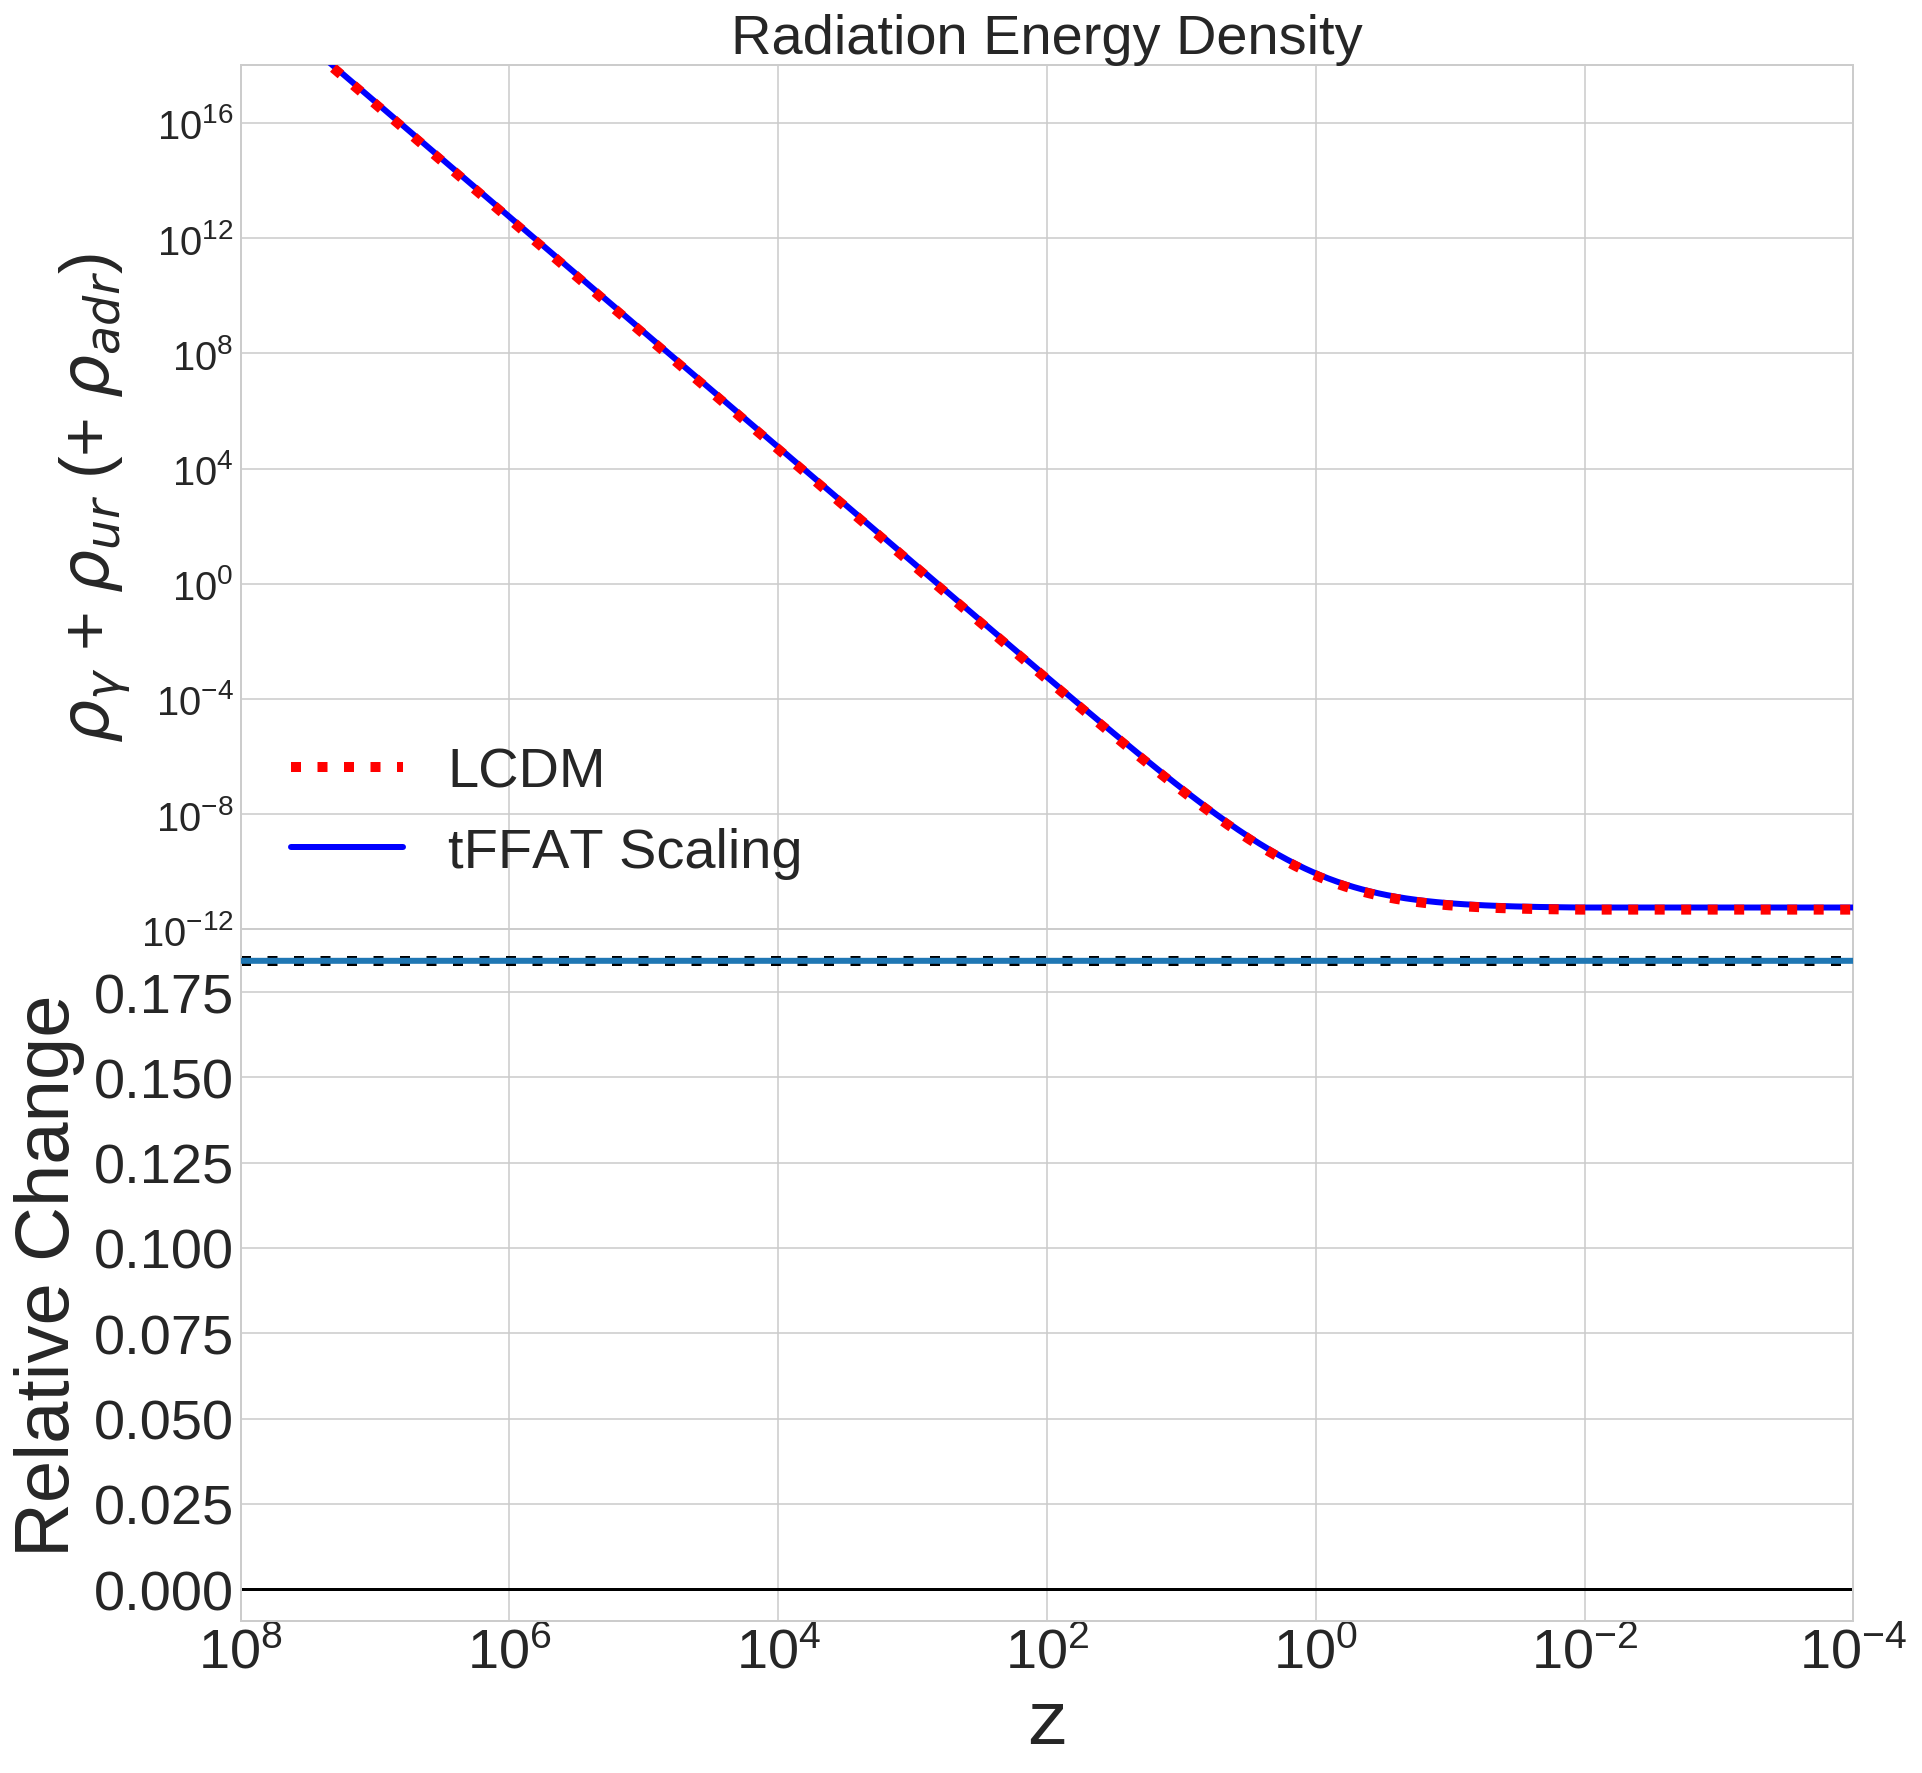

In [96]:
x1 = LCDM_z_back
y1 = LCDM_rho_ur + LCDM_rho_g
x2 = FFAT_z_back
y2 = FFAT_rho_ur + FFAT_rho_g + FFAT_rho_adr
y_res = (y2-y1)/y1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\rho_{\gamma}$ + $\rho_{ur}$ (+ $\rho_{adr}$)',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Radiation Energy Density', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.184142,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_rad.pdf', dpi=800,bbox_inches='tight')  
plt.show()



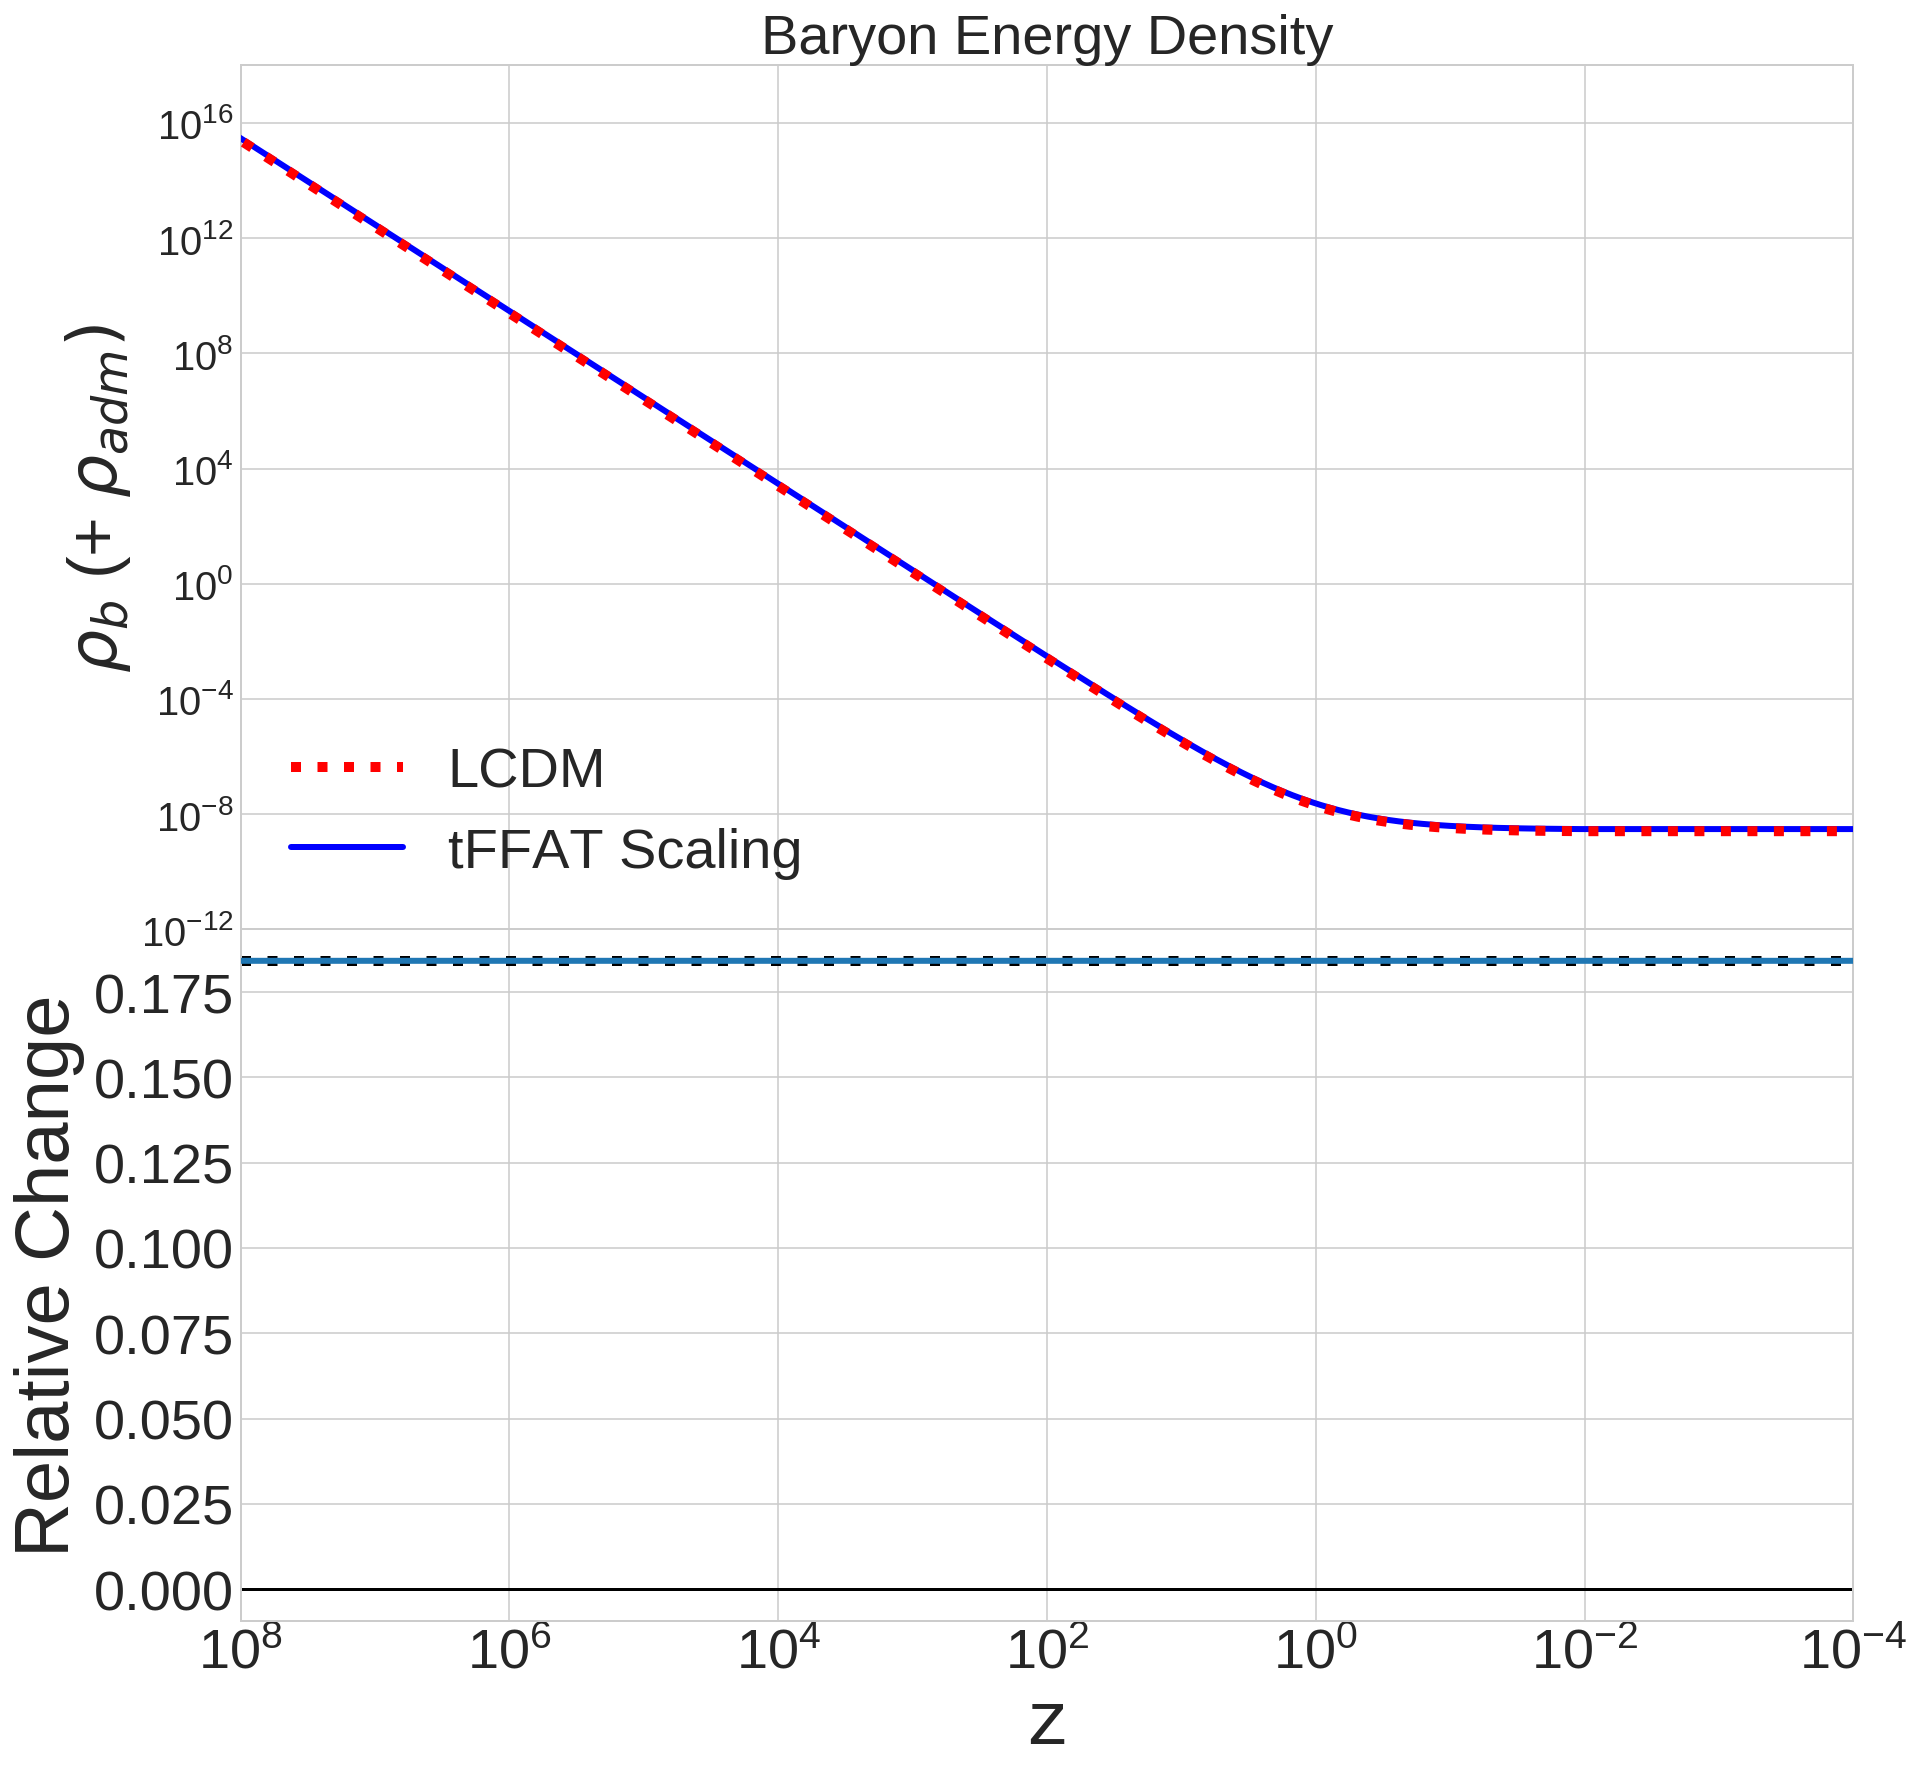

In [97]:
x1 = LCDM_z_back
y1 = LCDM_rho_b
x2 = FFAT_z_back
y2 = FFAT_rho_b + FFAT_rho_adm
y_res = (y2-y1)/y1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\rho_{b}$ (+ $\rho_{adm})$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Baryon Energy Density', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.18414,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



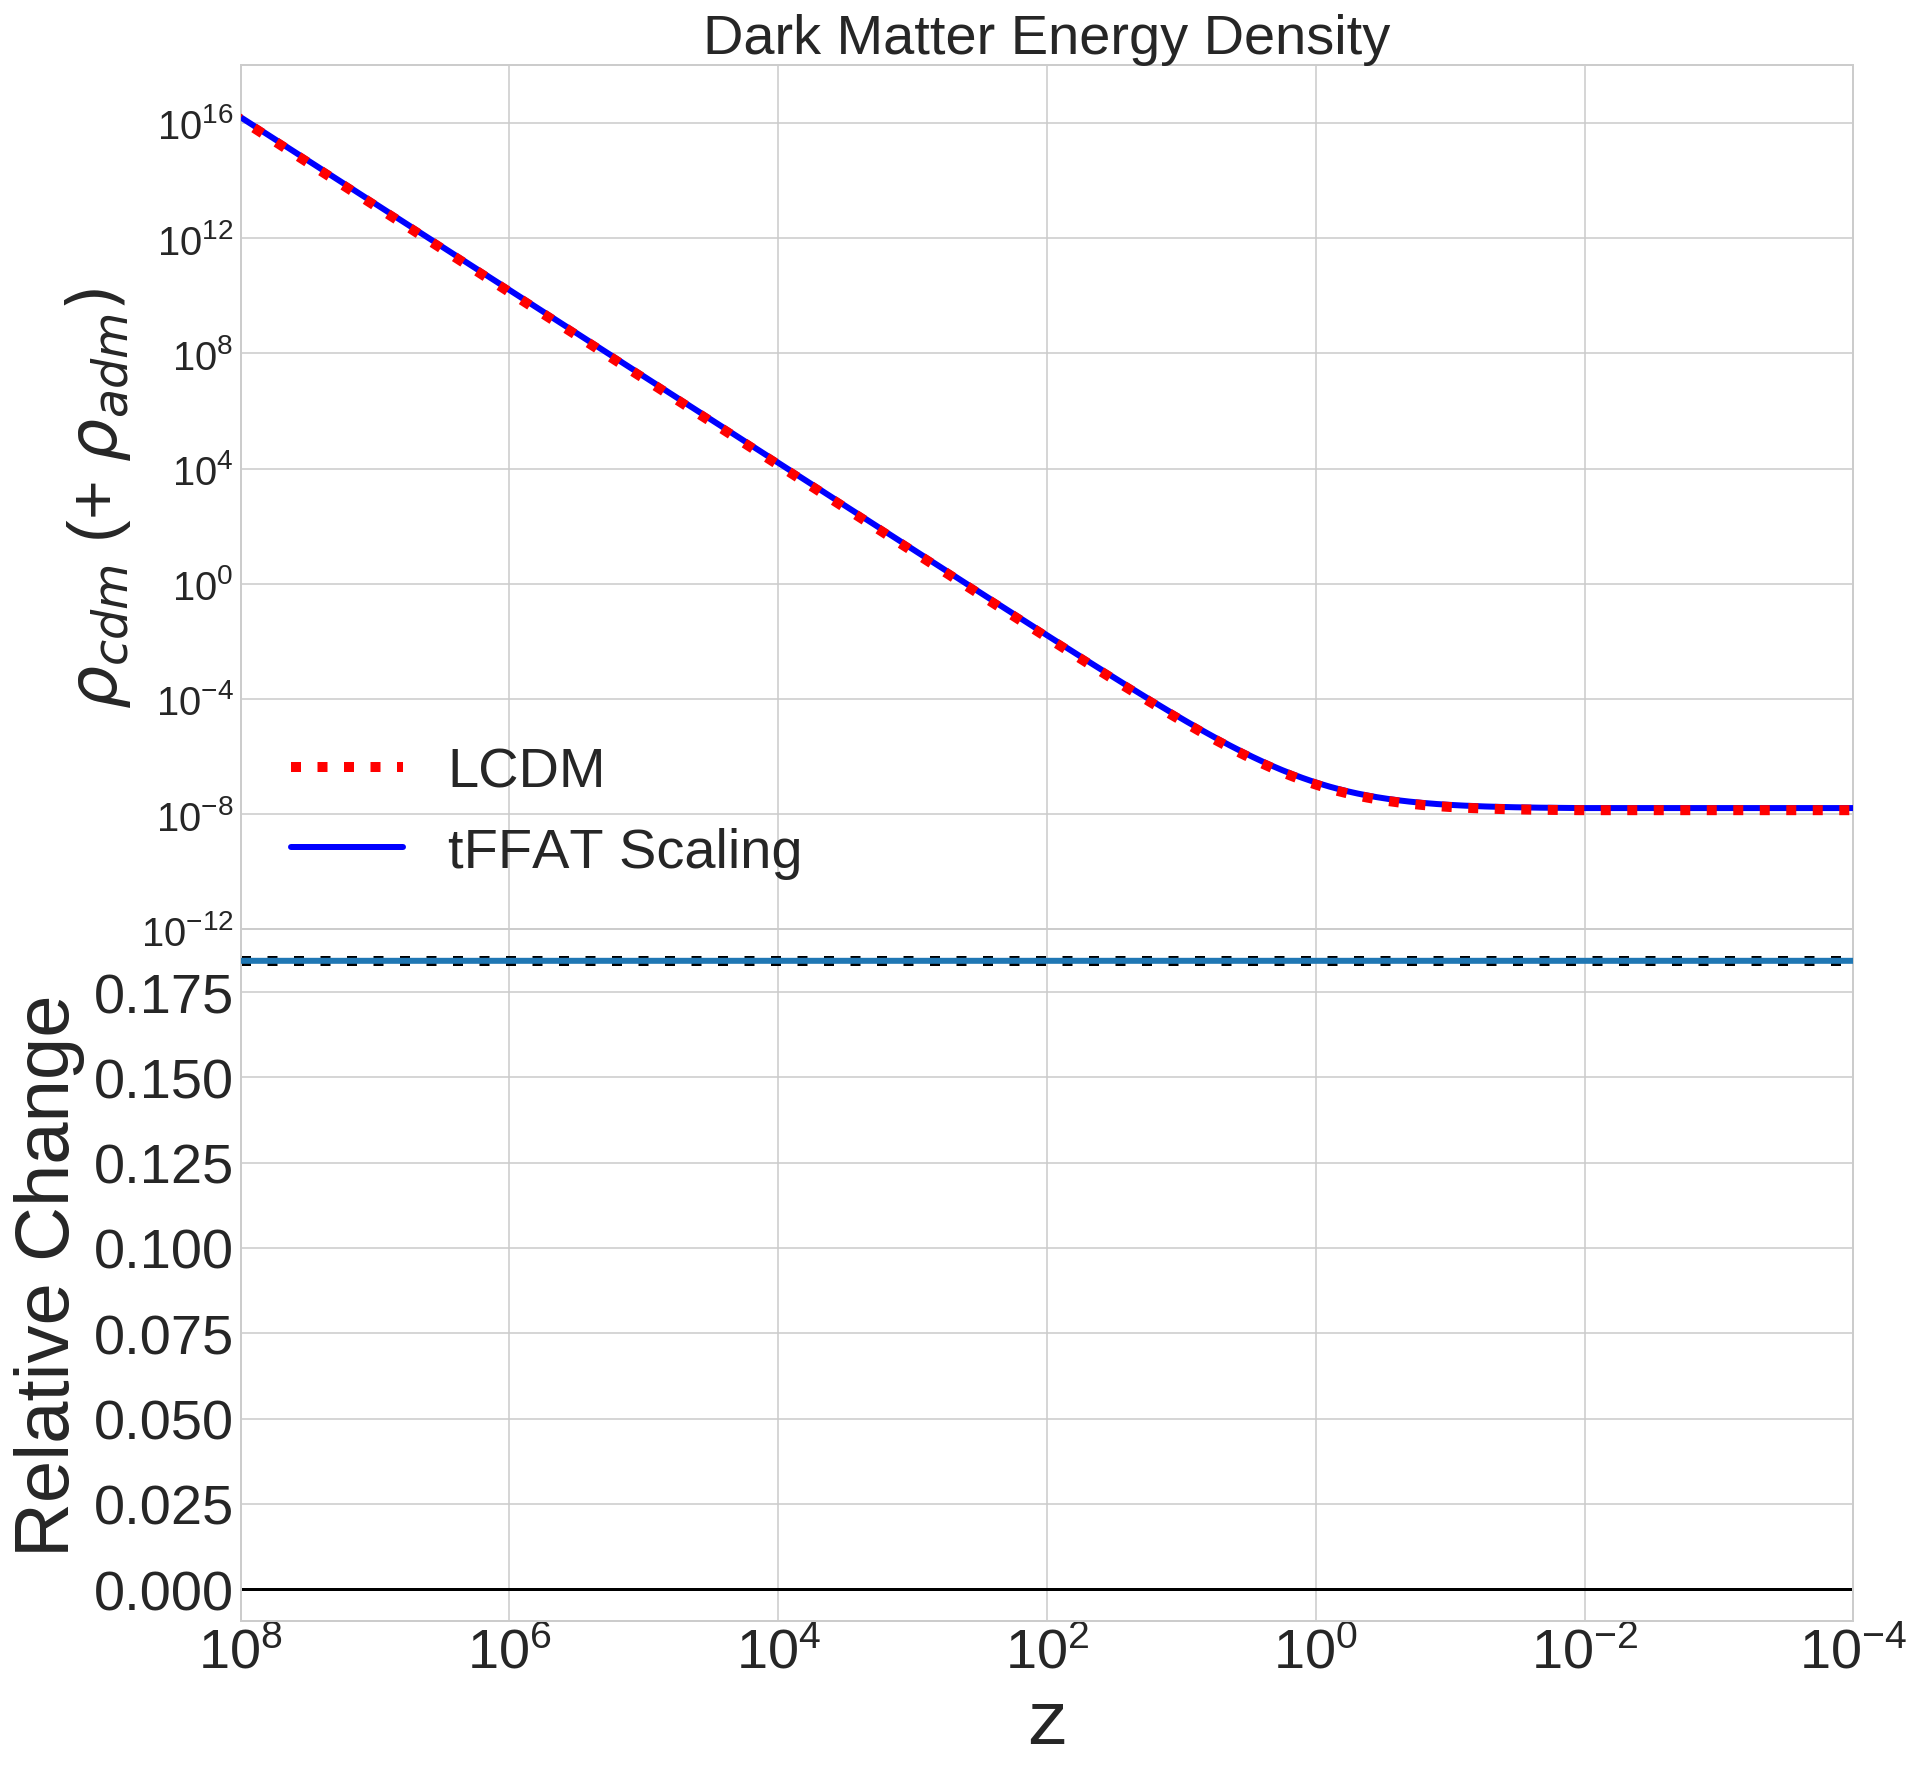

In [98]:
x1 = LCDM_z_back
y1 = LCDM_rho_cdm
x2 = FFAT_z_back
y2 = FFAT_rho_cdm #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\rho_{cdm}$ (+ $\rho_{adm})$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Dark Matter Energy Density', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.18414,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



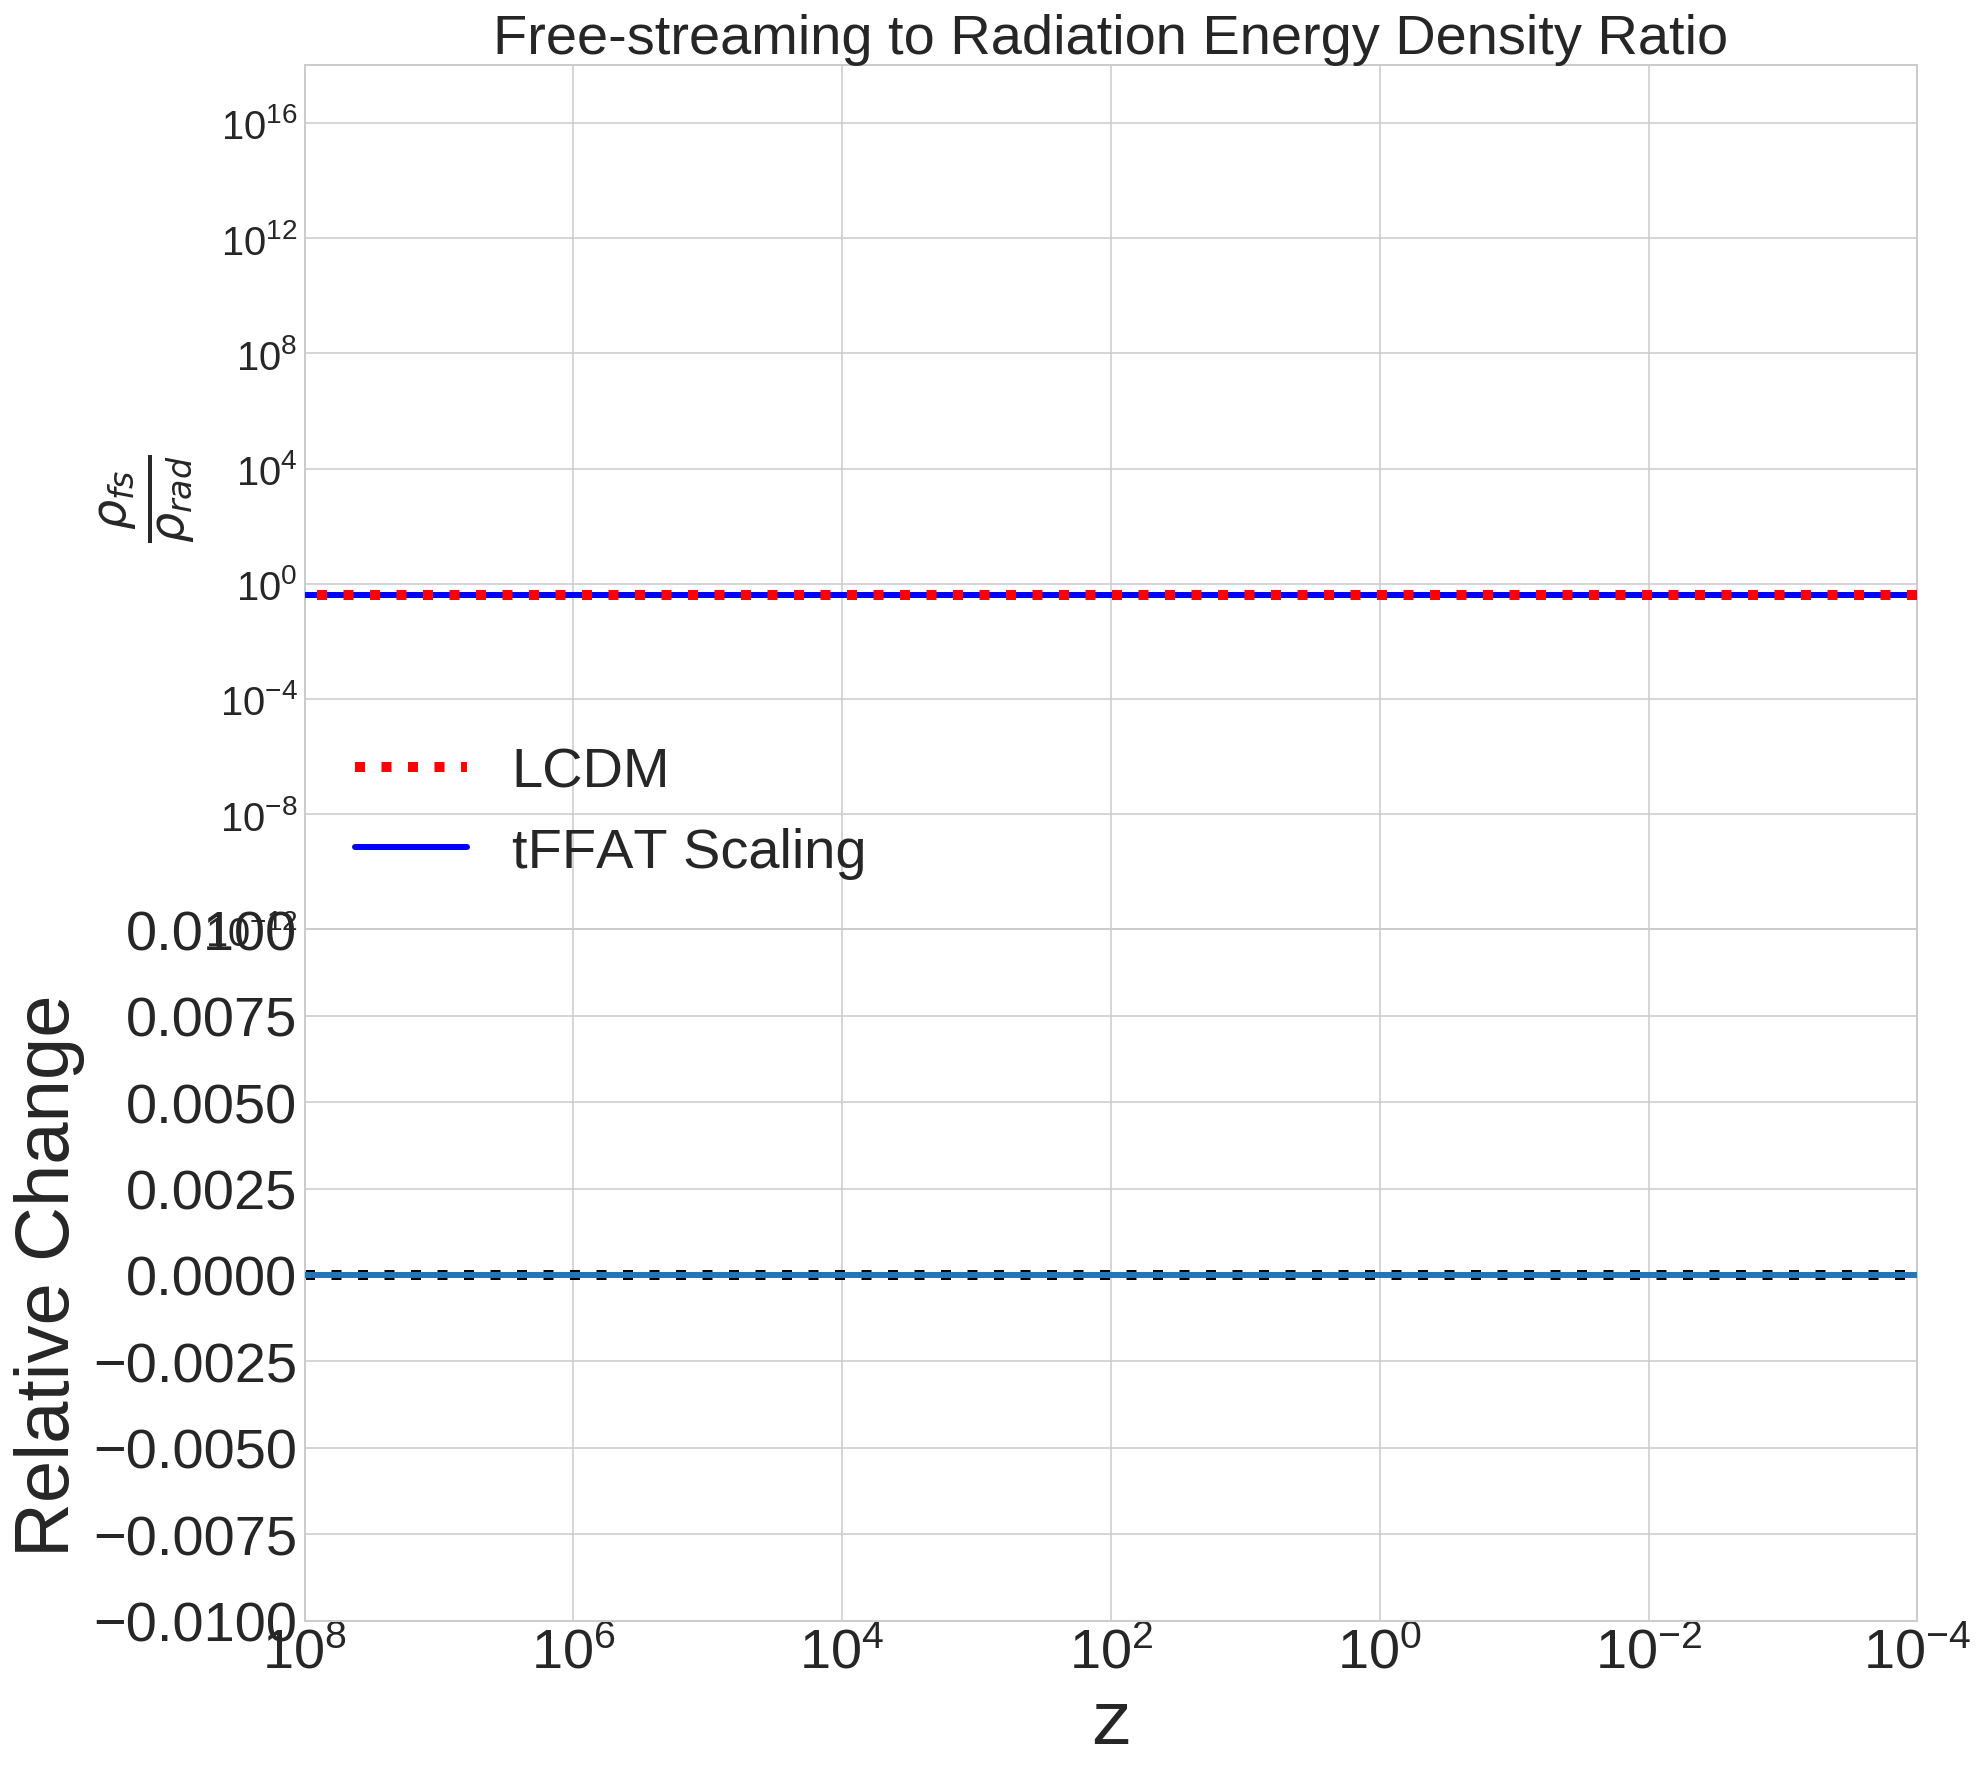

In [99]:
x1 = LCDM_z_back
y1 = LCDM_rho_ur/(LCDM_rho_ur + LCDM_rho_g)
x2 = FFAT_z_back
y2 = FFAT_rho_ur/(FFAT_rho_ur + FFAT_rho_g + FFAT_rho_adr)
y_res = (y2-y1)/y1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\frac{\rho_{fs}}{\rho_{rad}}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Free-streaming to Radiation Energy Density Ratio', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.0,color='black',linestyle='dotted',linewidth=5)
plt.ylim(-0.01,0.01)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



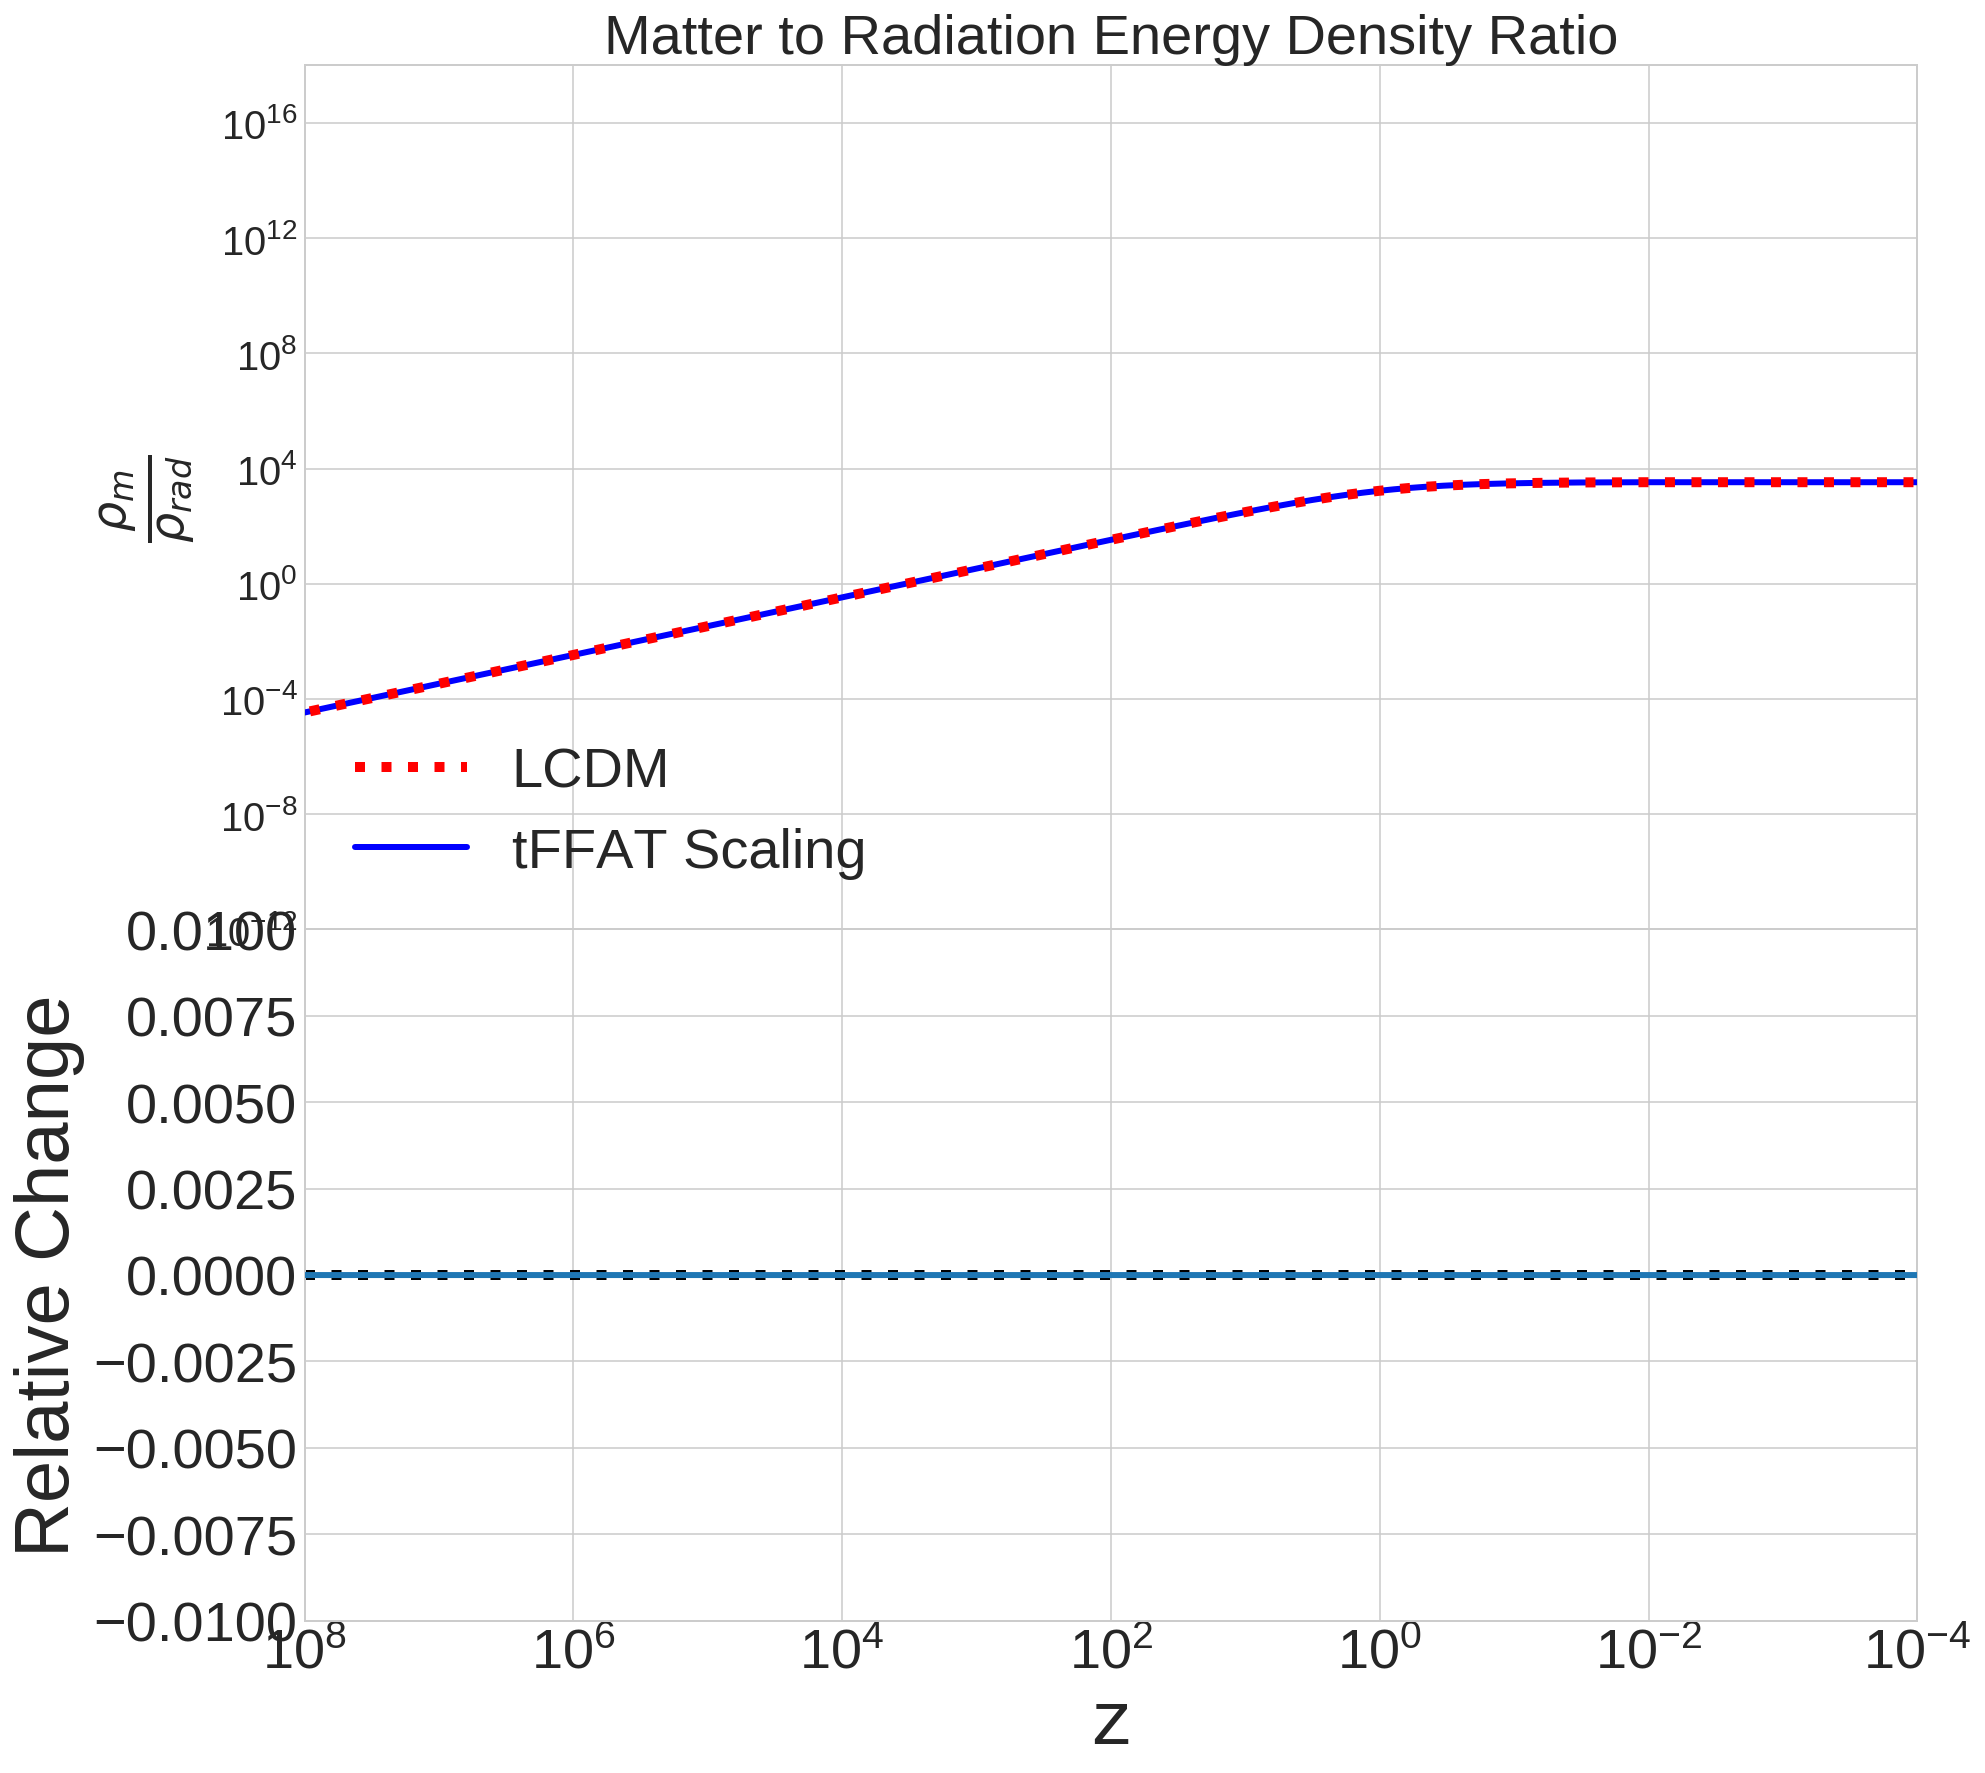

In [100]:
x1 = LCDM_z_back
y1 = (LCDM_rho_cdm + LCDM_rho_b)/(LCDM_rho_ur + LCDM_rho_g)
x2 = FFAT_z_back
y2 = (FFAT_rho_cdm+FFAT_rho_b+FFAT_rho_adm)/(FFAT_rho_ur + FFAT_rho_g + FFAT_rho_adr)
y_res = (y2-y1)/y1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\frac{\rho_{m}}{\rho_{rad}}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Matter to Radiation Energy Density Ratio', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.0,color='black',linestyle='dotted',linewidth=5)
plt.ylim(-0.01,0.01)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()

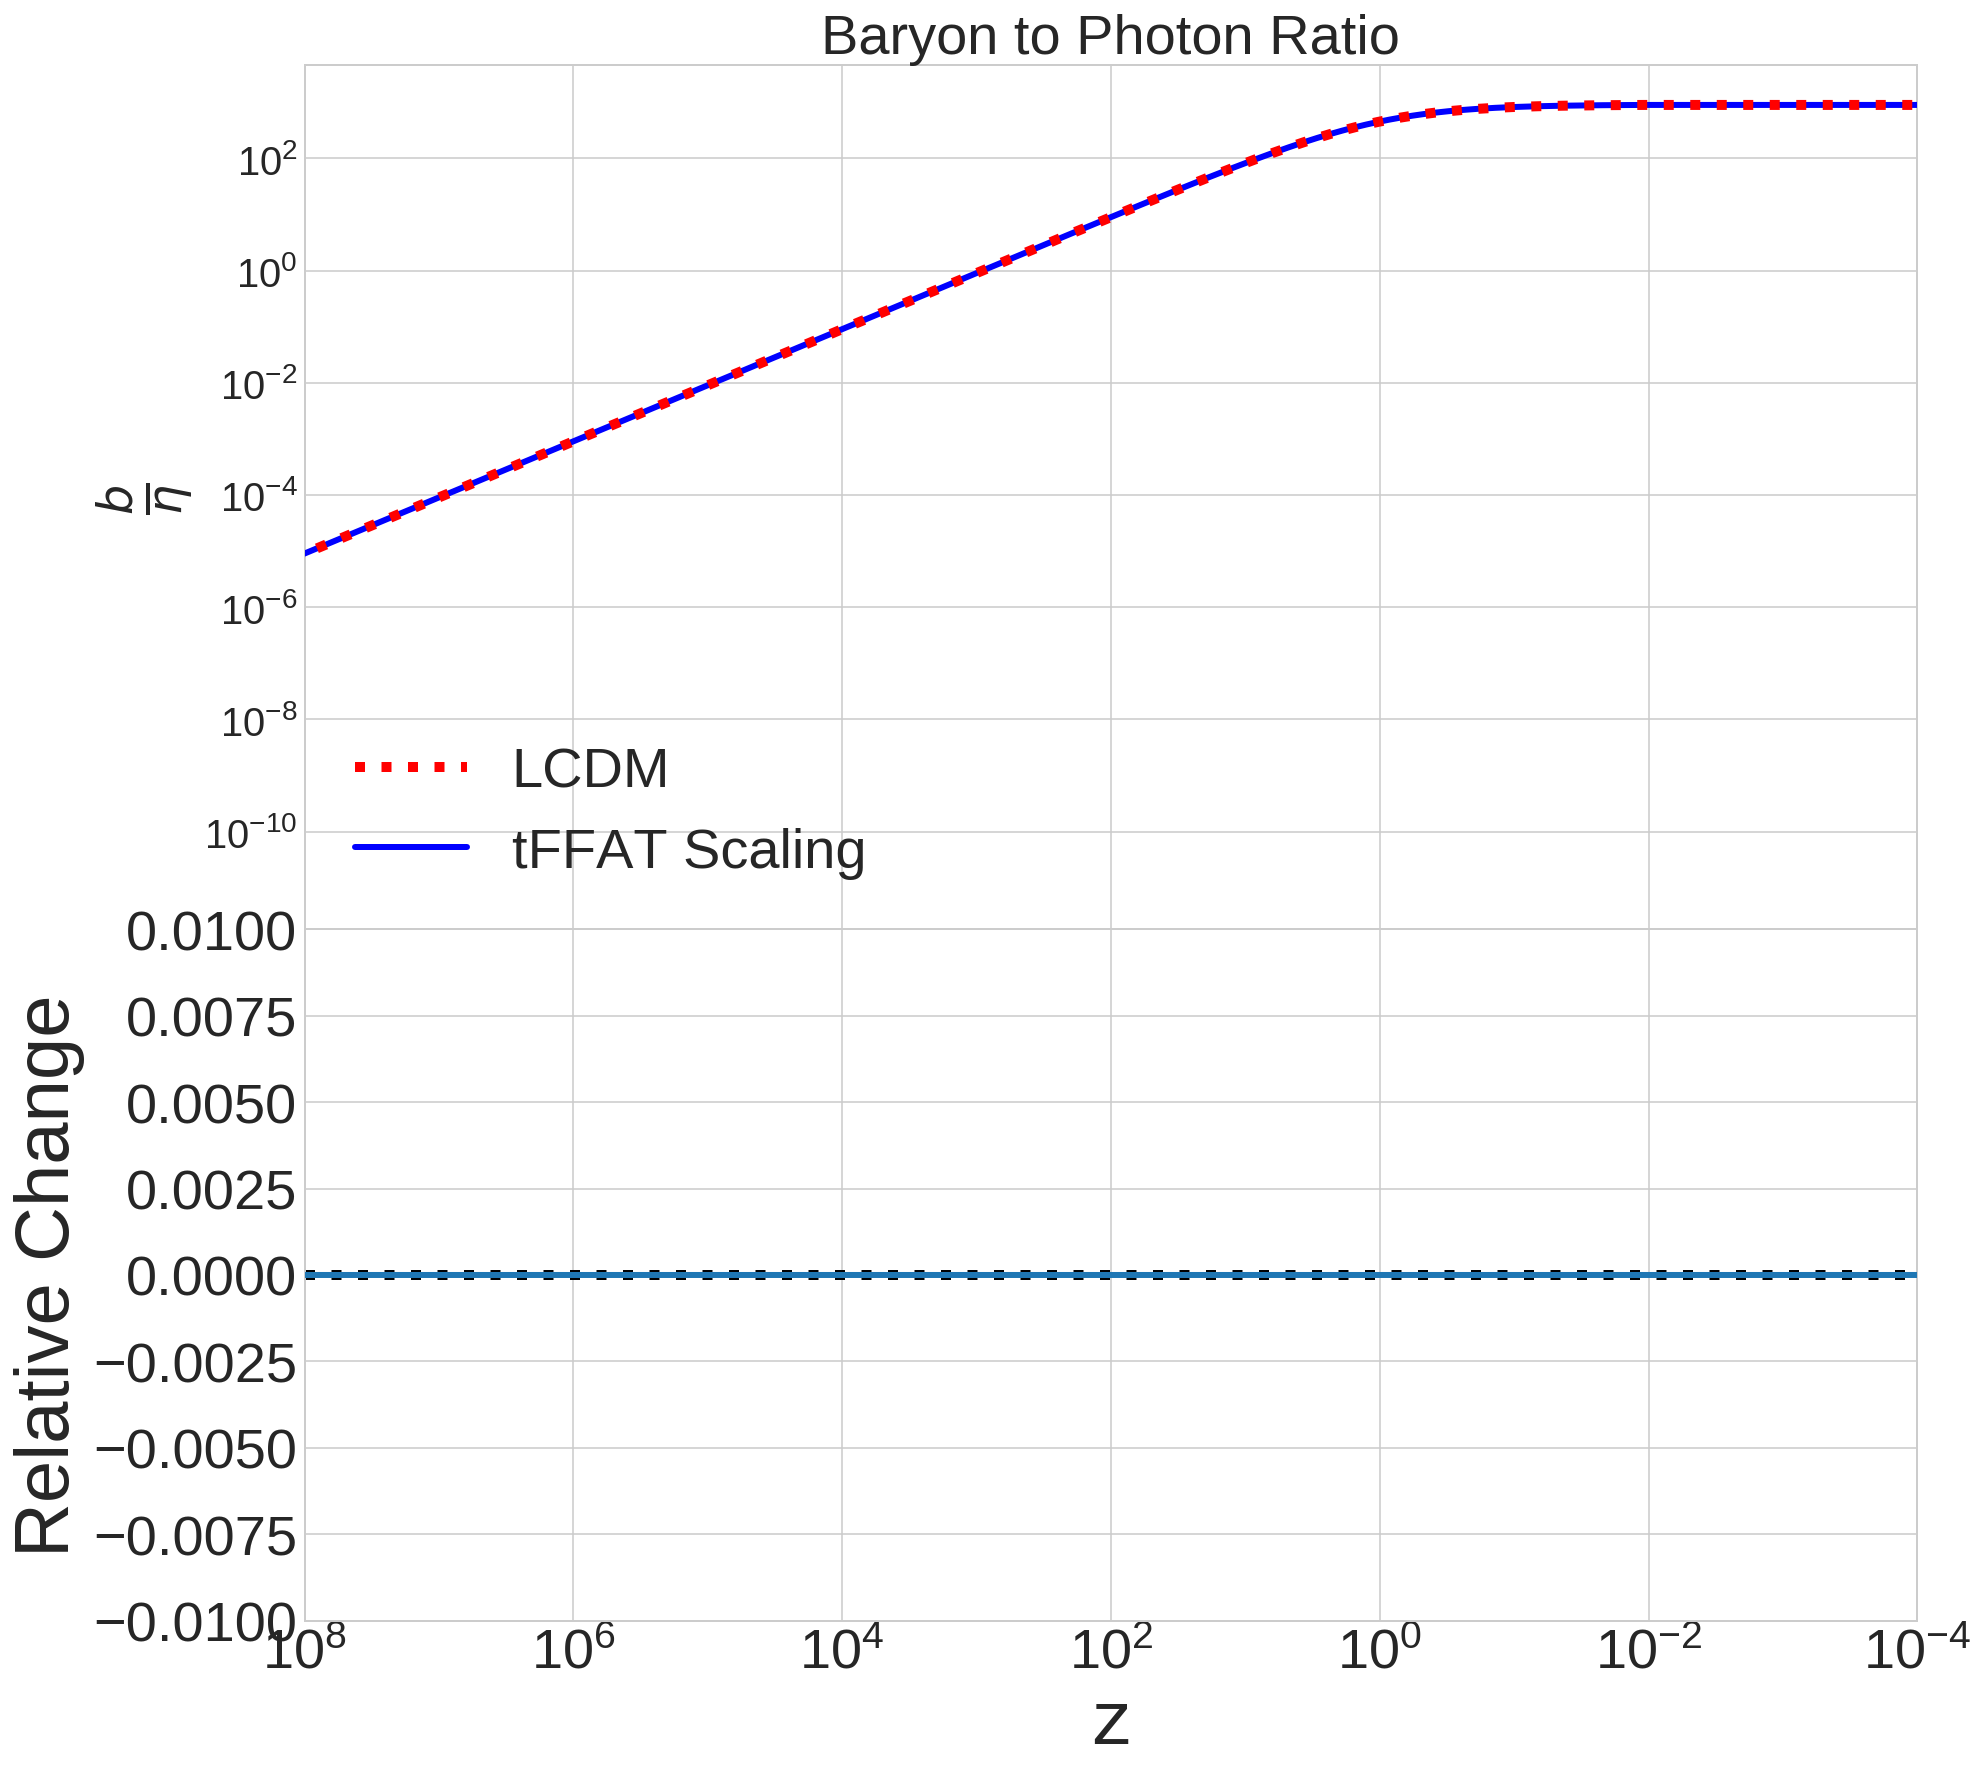

In [101]:
x1 = LCDM_z_back
y1 = (LCDM_rho_b)/(LCDM_rho_g)
x2 = FFAT_z_back
y2 = (FFAT_rho_b+FFAT_rho_adm)/(FFAT_rho_g+FFAT_rho_adr)
y_res = (y2-y1)/y1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
#plt.ylim(0,1)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\frac{b}{\eta}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Baryon to Photon Ratio', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.grid(True)
plt.axhline(0.0,color='black',linestyle='dotted',linewidth=5)
plt.ylim(-0.01,0.01)


plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_rad.pdf', dpi=800,bbox_inches='tight')  
plt.show()

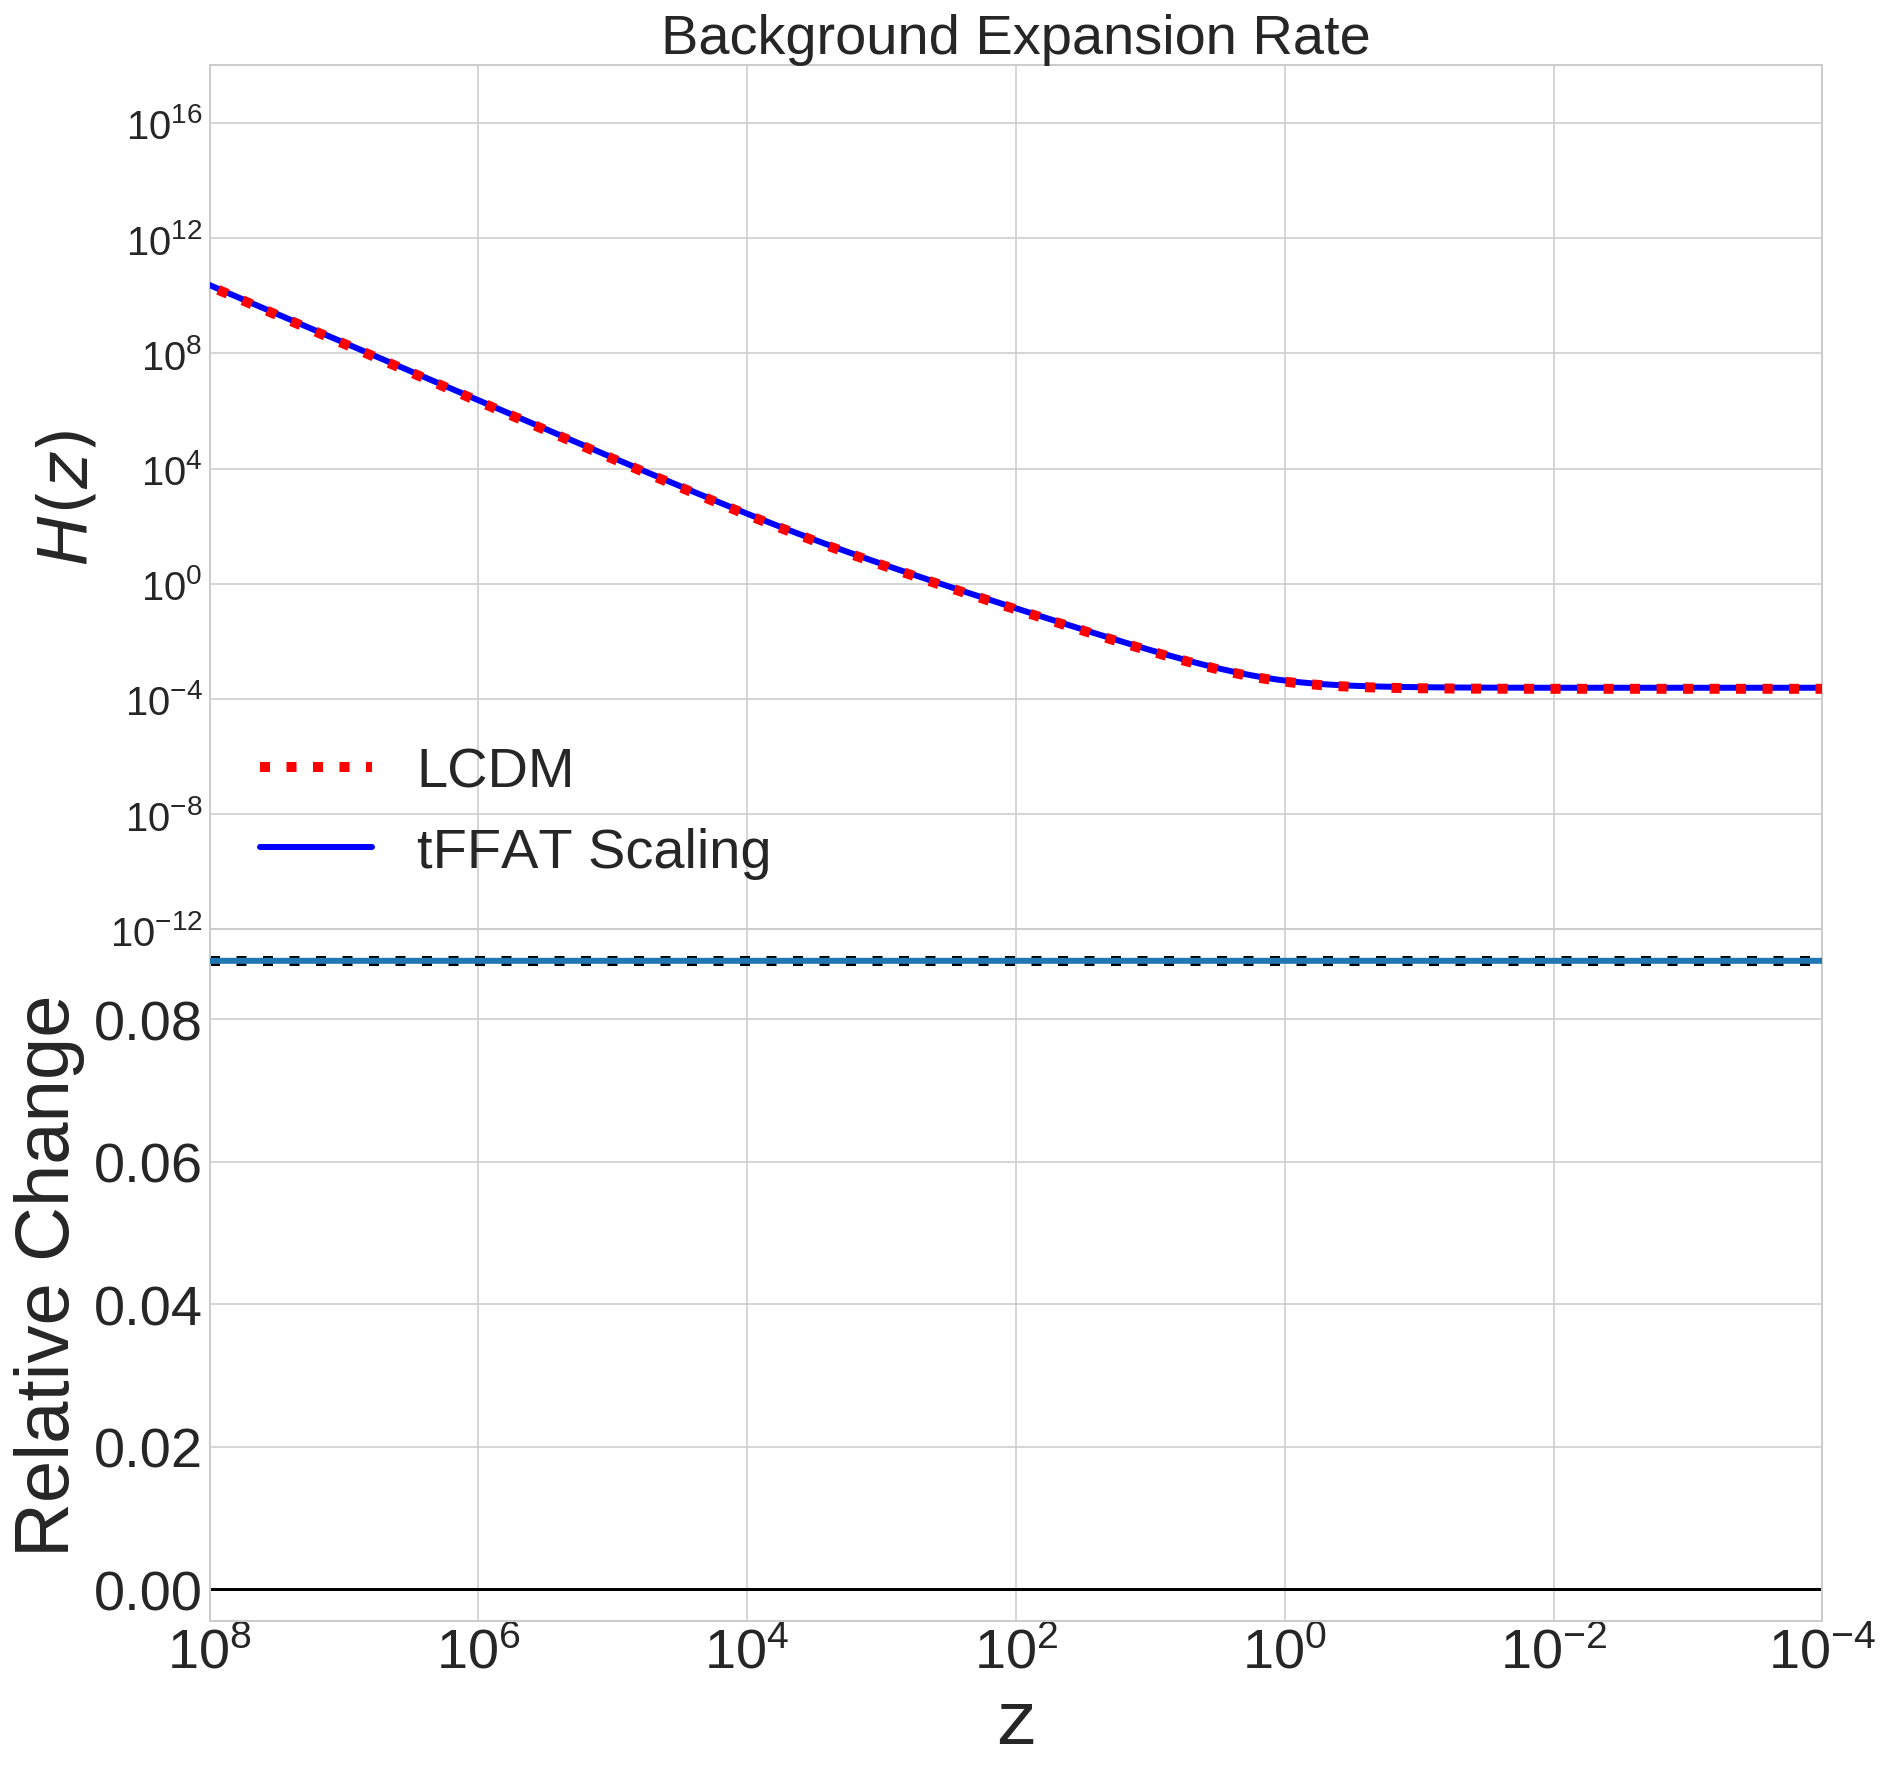

In [102]:
x1 = LCDM_z_back
y1 = LCDM_H_z
x2 = FFAT_z_back
y2 = FFAT_H_z
y_res = (y2-y1)/y1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$H(z)$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Background Expansion Rate', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(.088183,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_H_z.pdf', dpi=800,bbox_inches='tight')  
plt.show()



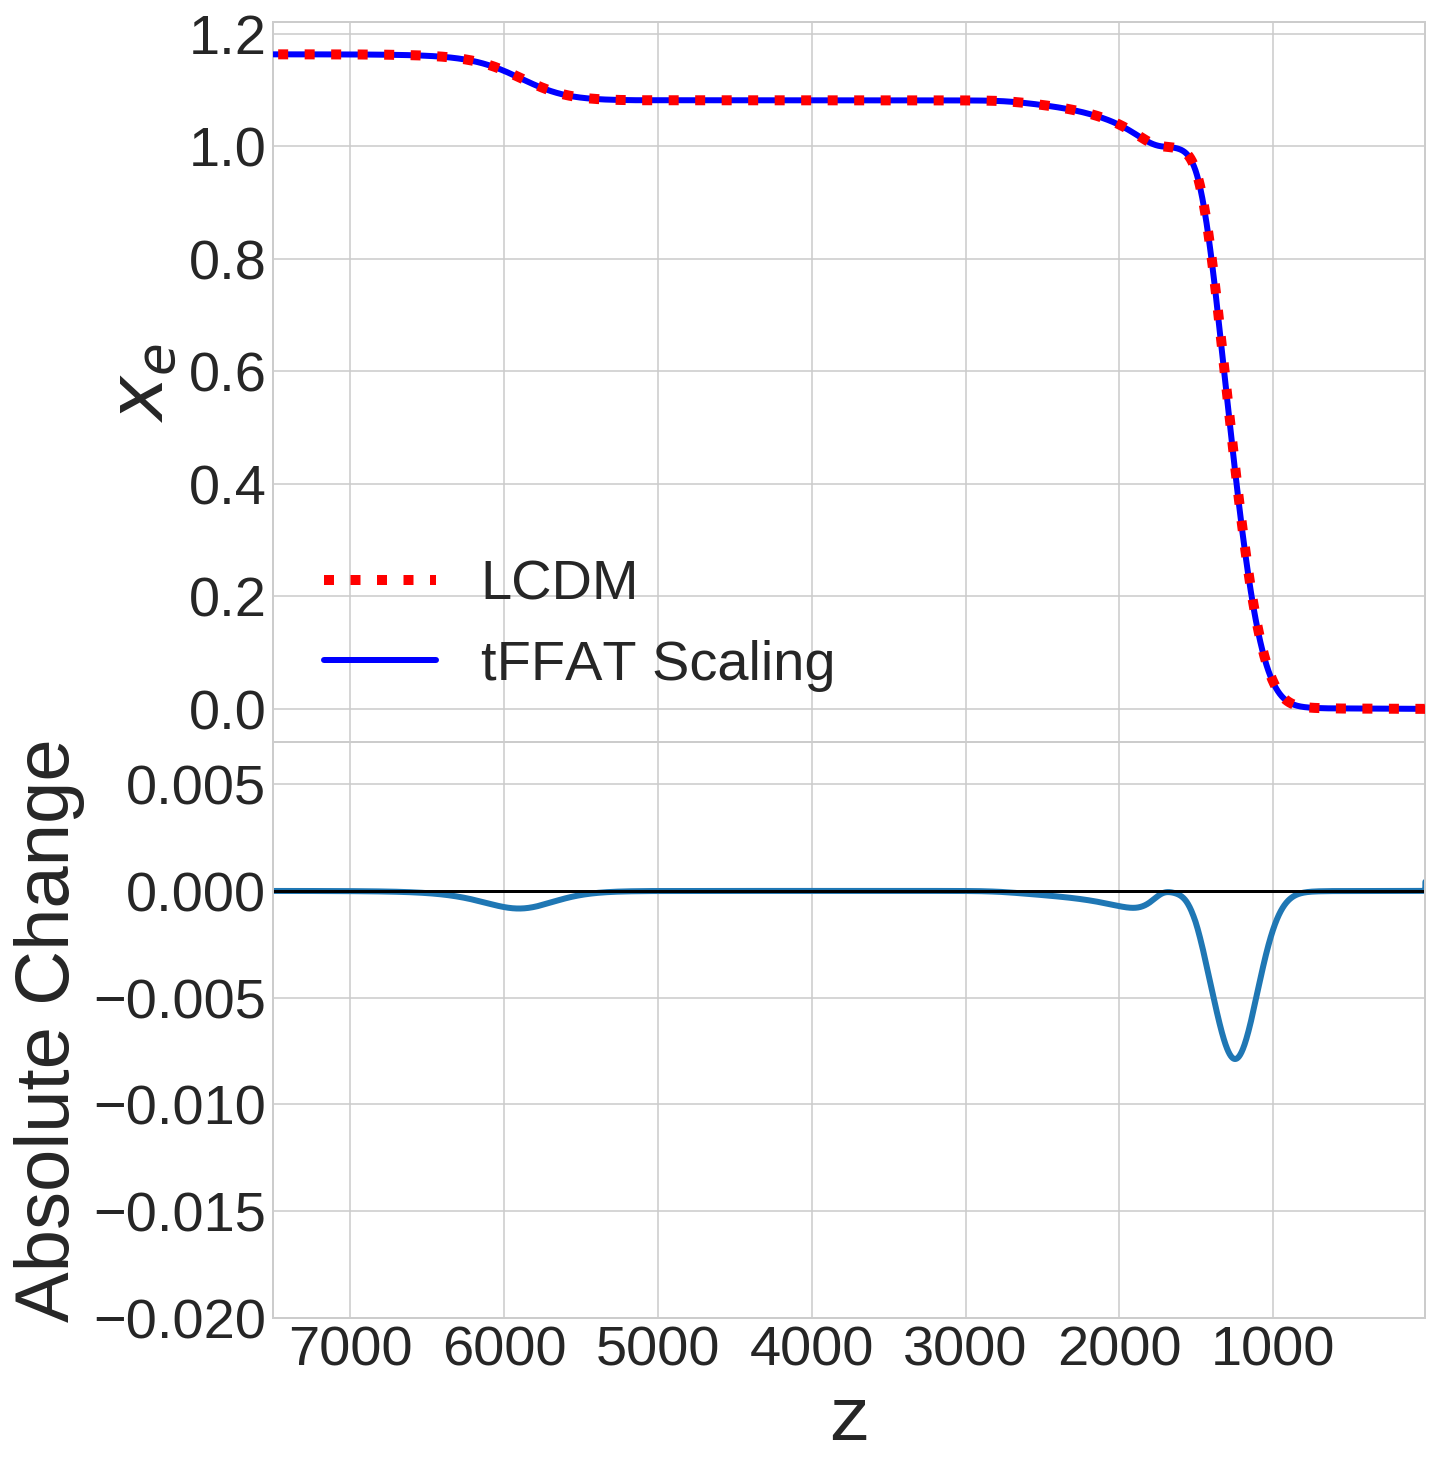

In [103]:
x1 = LCDM_z
y1 = LCDM_x_e
x2 = FFAT_z
y2 = FFAT_x_e


y2_interp = np.zeros(len(LCDM_x_e))
for i in range(len(LCDM_x_e)):
    y2_interp[i] = np.interp(LCDM_z[i],x2,y2)


y_res = (y2_interp-y1)#/y1
from pylab import *

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))

plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.xlim(7500,10)


plt.grid(True)
frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel("$x_e$",fontsize=38)

plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res,linewidth=3)
plt.xlim(7500,10)
plt.ylim(-.02,0.007)

plt.axhline(0,color='black')
plt.grid(True)
#grid()
plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Absolute Change",fontsize=38)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')



fig = plt.gcf()
fig.set_size_inches(10, 10)
#fig.savefig('plots/tffat_X_e_YHe.pdf', dpi=800,bbox_inches='tight')  
plt.show()



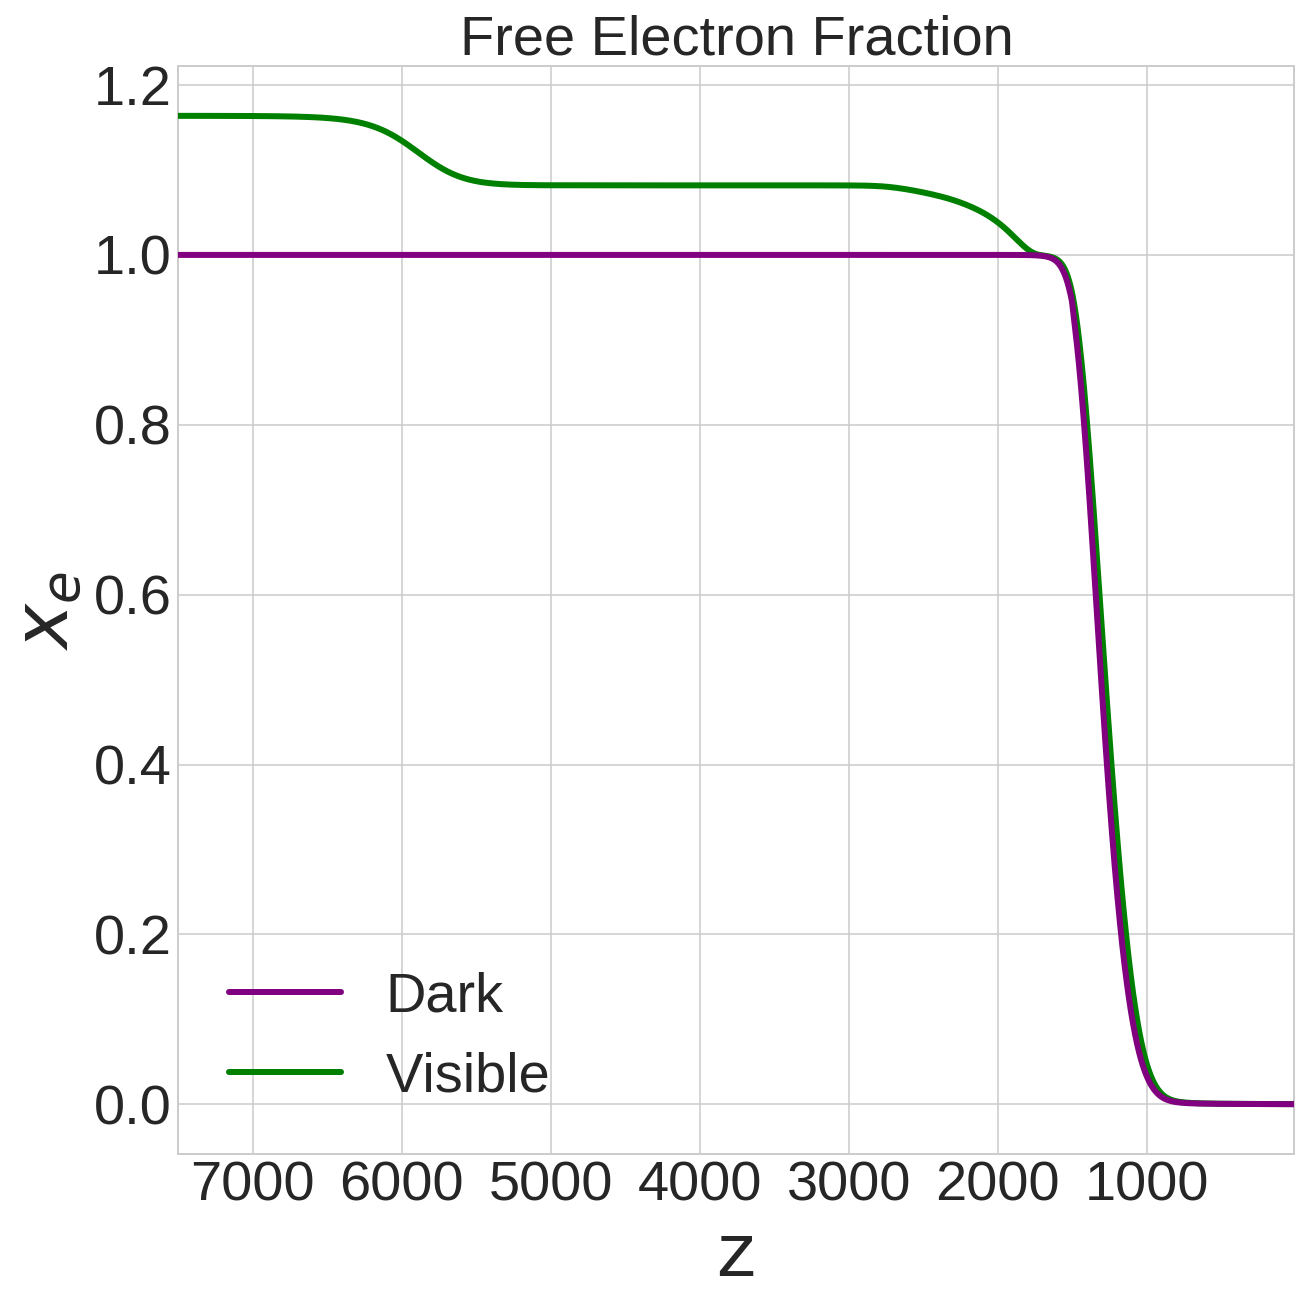

In [104]:
x1 = FFAT_z
y1 = FFAT_dark_x_e
x2 = FFAT_z
y2 = FFAT_x_e

#y2_interp = np.zeros(len(LCDM_x_e))
#for i in range(len(LCDM_x_e)):
#    y2_interp[i] = np.interp(LCDM_z[i],x2,y2)

from pylab import *

fig1 = figure(1)
#Plot Data-model

plt.plot(x1,y1,color="purple",zorder=10,linewidth=3)
plt.plot(x2,y2,color="green",zorder=9,linewidth=3)
plt.xlim(7500,10)


plt.grid(True)
#grid()

plt.yticks(fontsize= 28)
plt.ylabel("$x_e$",fontsize=38)
plt.title('Free Electron Fraction', fontsize=28)
plt.legend(['Dark','Visible'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=38)
plt.xticks(fontsize= 28)

fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('tffat_X_e.pdf', dpi=800,bbox_inches='tight')  
plt.show()



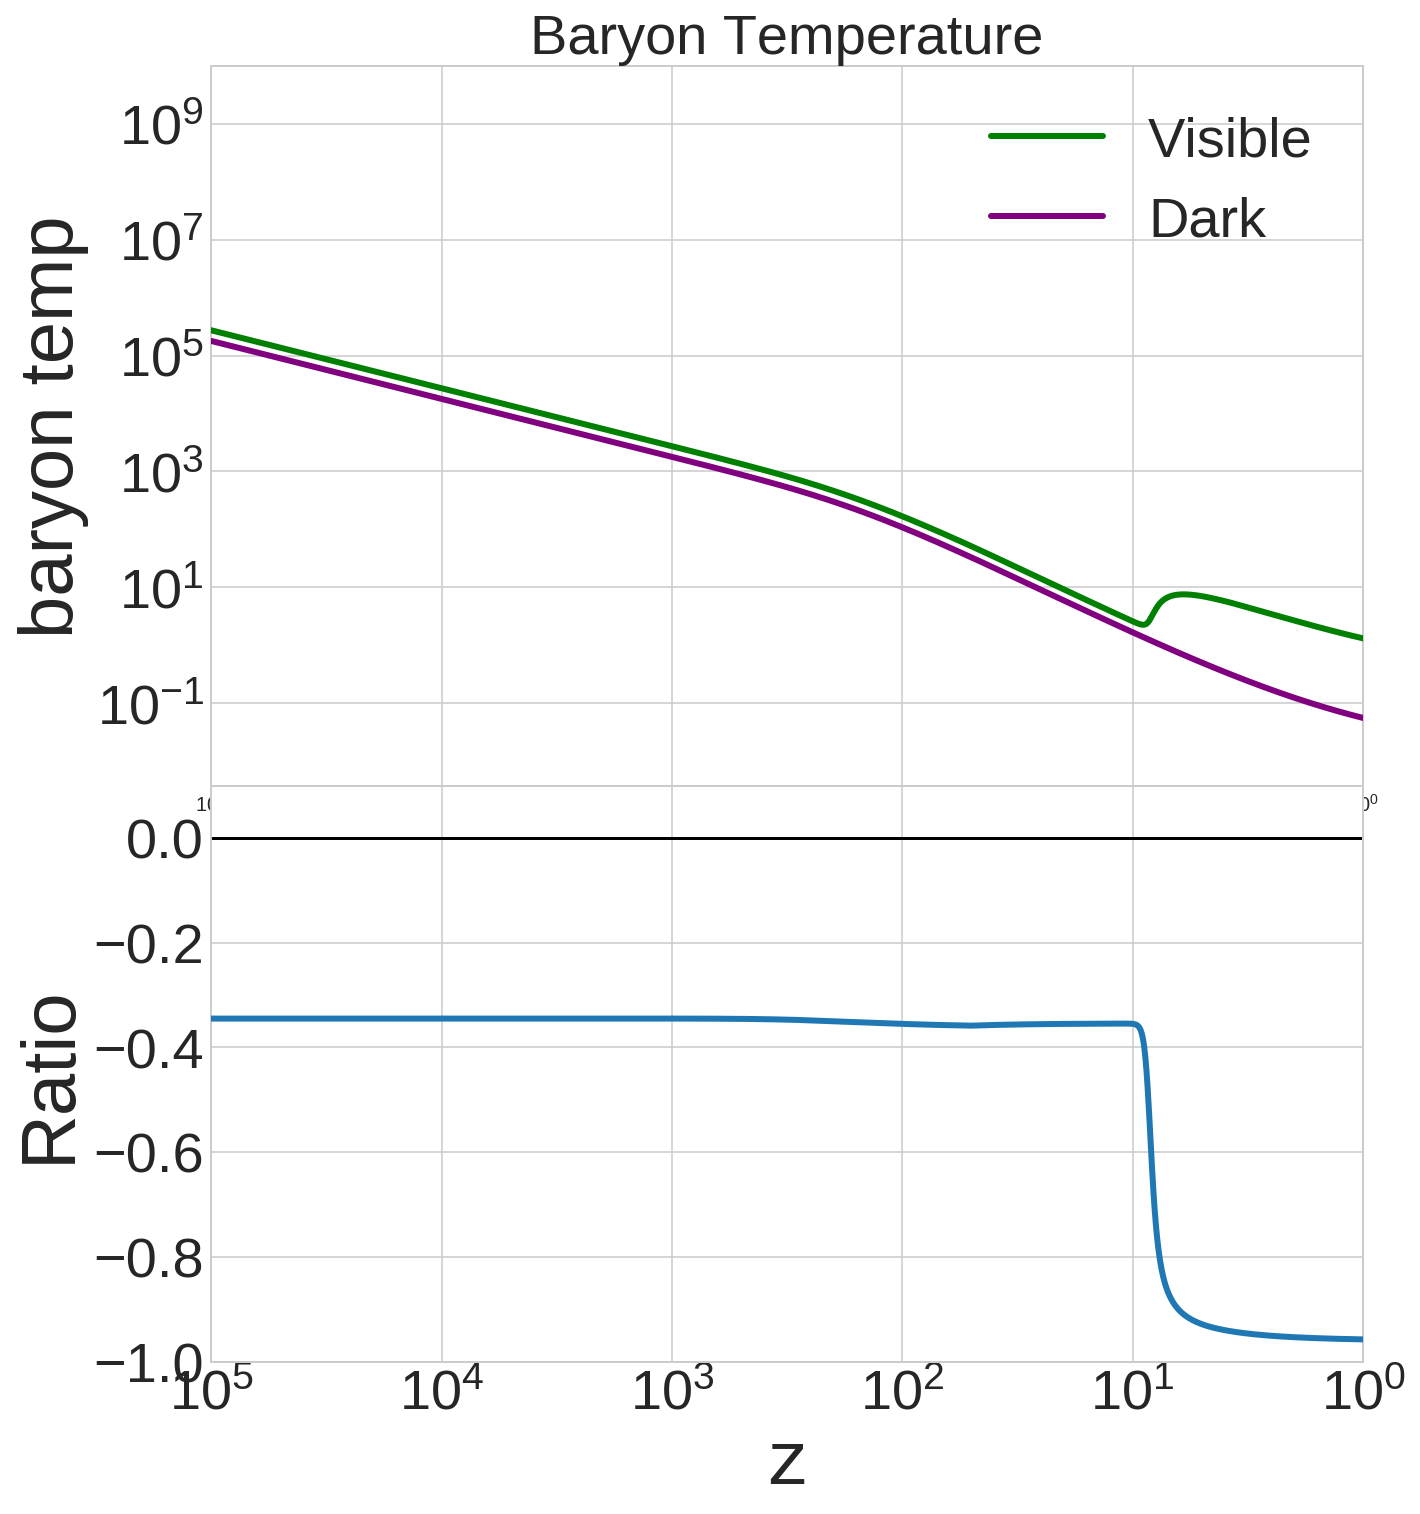

In [105]:
x1 = FFAT_z
#y1 = FFAT_dark_kappa_dot
y1 = FFAT_baryon_T
#x2 = FFAT_z
#x2 = FFAT_kappa_dot

#x1 = LCDM_z
#y1 = LCDM_kappa_dot
x2 = FFAT_z
y2 = FFAT_T_adm

#y2_interp = np.zeros(len(LCDM_x_e))
#for i in range(len(LCDM_x_e)):
#    y2_interp[i] = np.interp(LCDM_z[i],x2,y2)

y_res = (y2-y1)/y1
#y_res = FFAT_T_idm/FFAT_baryon_T


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="green",zorder=10,linewidth=3)
plt.plot(x2,y2,color="purple",zorder=10,linewidth=3)
plt.xlim(100000,1)
#plt.ylim(1,100000)


plt.xscale("log")
plt.yscale("log")


plt.grid(True)
#frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel(r"baryon temp",fontsize=38)
plt.title('Baryon Temperature', fontsize=28)
plt.legend(['Visible','Dark'],loc = "upper right", fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        

plt.grid(True)
#grid()
plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
#plt.yscale("log")
plt.xlim(100000,1)
plt.xscale("log")
plt.ylim(-1,0.1)
plt.ylabel("Ratio",fontsize=38)
plt.axhline(0,color='black')
#plt.axhline(.087537,color='black',linestyle='dotted',linewidth=5)

fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('tffat_X_e.pdf', dpi=800,bbox_inches='tight')  
plt.show()

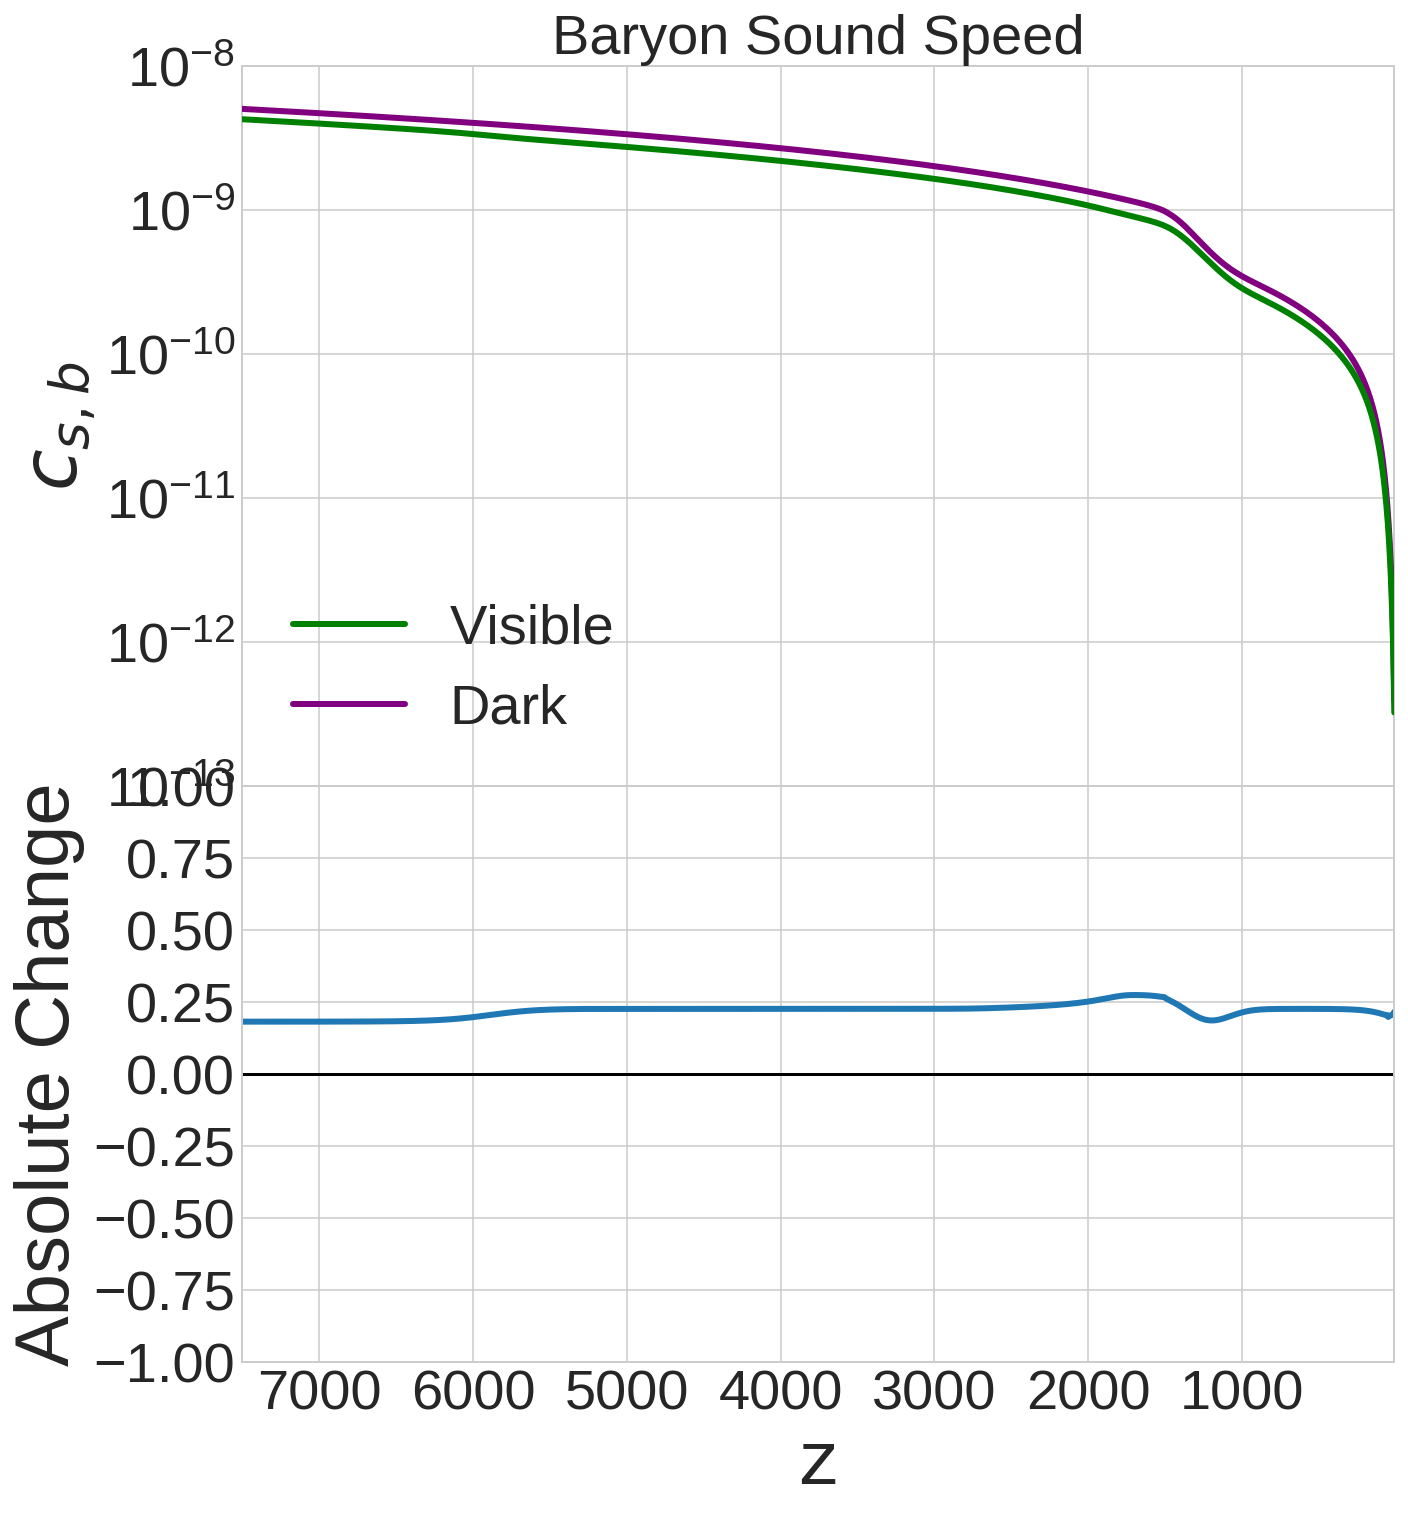

In [106]:
x1 = FFAT_z
y1 = FFAT_c_s_b
x2 = FFAT_z
y2 = FFAT_dark_cb2


y2_interp = np.zeros(len(LCDM_x_e))
for i in range(len(LCDM_x_e)):
    y2_interp[i] = np.interp(LCDM_z[i],x2,y2)


y_res = (y2_interp-y1)/y1
from pylab import *

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))

plt.plot(x1,y1,color="green",zorder=10,linewidth=3)
plt.plot(x2,y2,color="purple",zorder=9,linewidth=3)
plt.xlim(7500,10)
plt.ylim(1e-13,1e-8)
plt.yscale('log')


plt.grid(True)
frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel("$c_{s,b}$",fontsize=38)
plt.title('Baryon Sound Speed', fontsize=28)
plt.legend(['Visible','Dark'],loc = 3, fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res,linewidth=3)
plt.xlim(7500,10)
plt.ylim(-1,1)

plt.axhline(0,color='black')
plt.grid(True)
#grid()
plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Absolute Change",fontsize=38)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')



fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('tffat_X_e.pdf', dpi=800,bbox_inches='tight')  
plt.show()


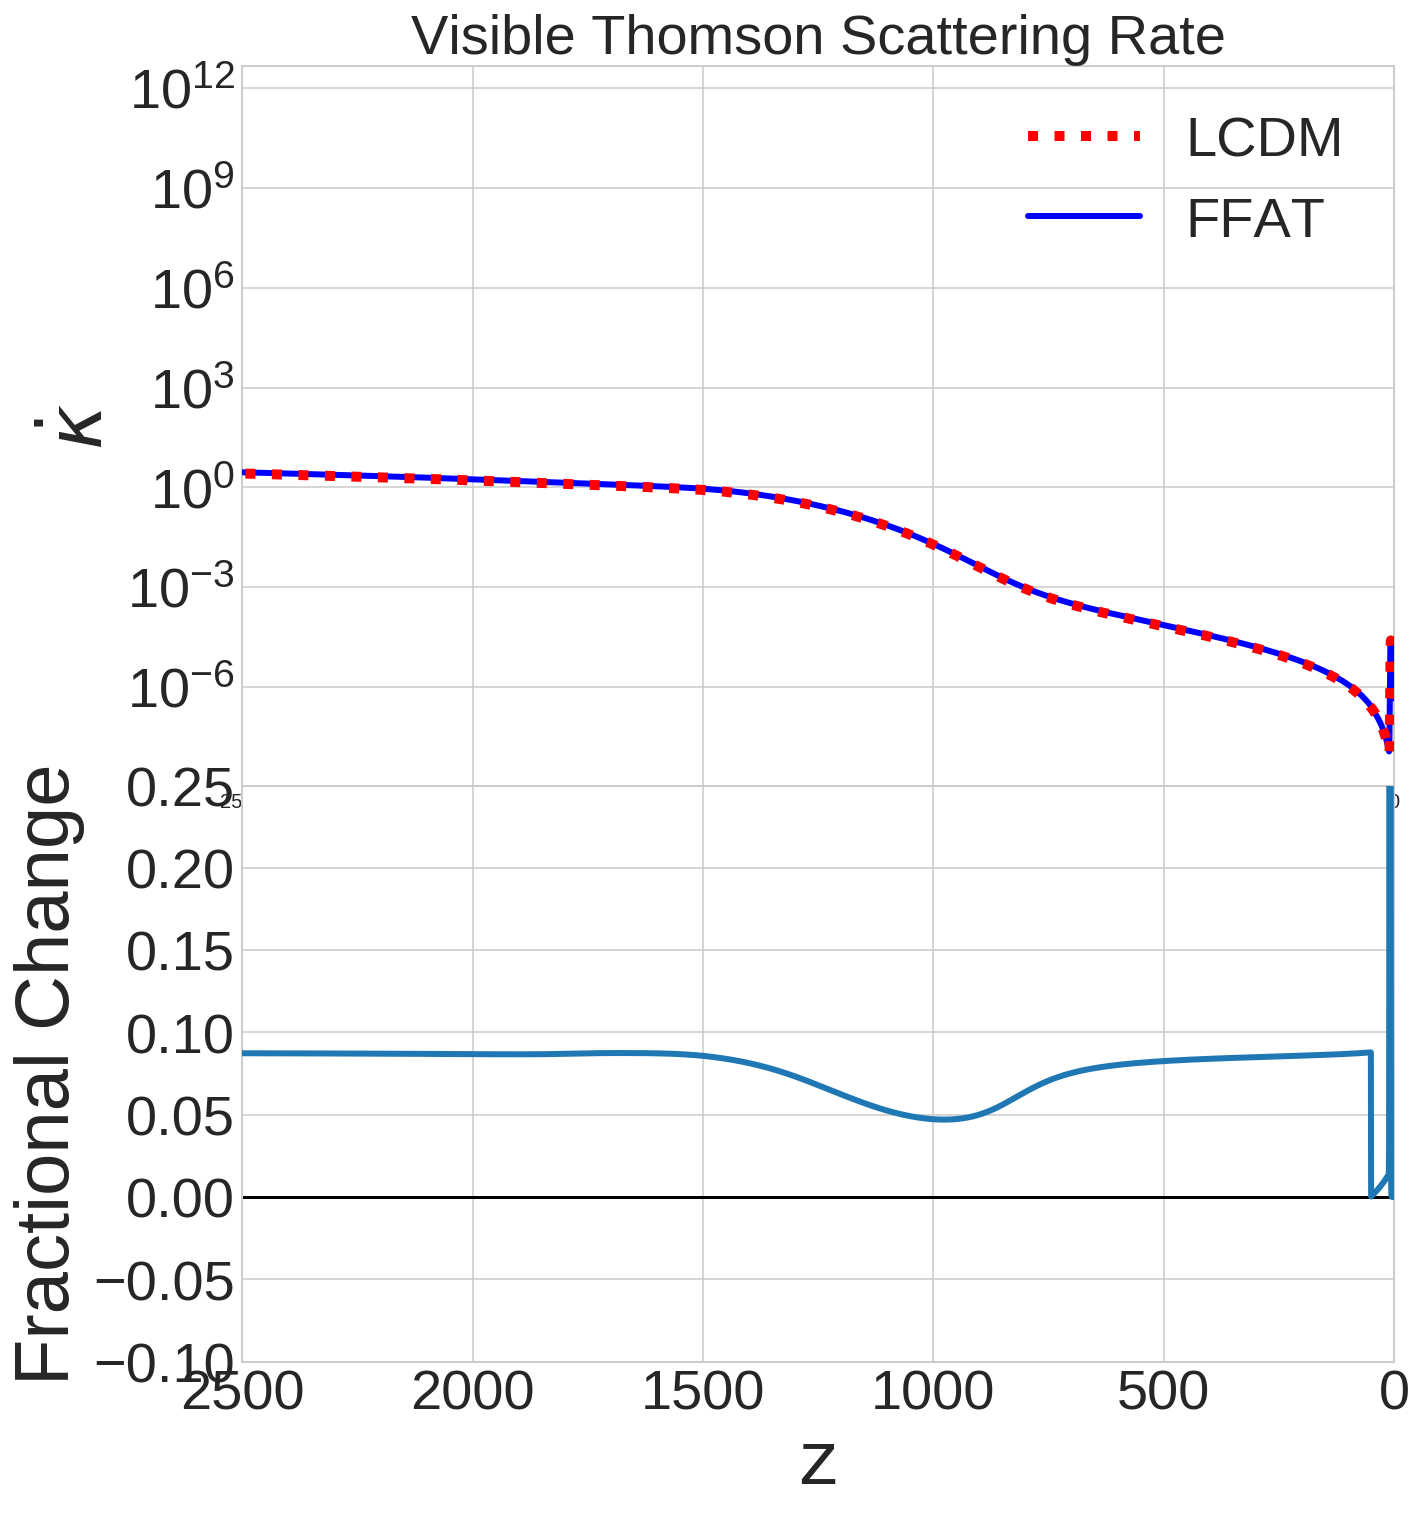

In [107]:
#x1 = FFAT_z
#y1 = FFAT_dark_kappa_dot
#y1 = FFAT_dmu_idm_dr
#x2 = FFAT_z
#x2 = FFAT_kappa_dot

x1 = LCDM_z
y1 = LCDM_kappa_dot
x2 = FFAT_z
y2 = FFAT_kappa_dot

y2_interp = np.interp(LCDM_z,x2,y2)
#for i in range(len(FFAT_kappa_dot)):
#    y2_interp[i] = np.interp(LCDM_z[i],x2,y2)

y_res = (y2_interp-y1)/y1


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",linestyle='dotted',zorder=10,linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.xlim(2500,0)
#plt.ylim(-0.5,5)


#plt.xscale("log")
plt.yscale("log")


plt.grid(True)
#frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel(r"$\dot{\kappa}$",fontsize=38)
plt.title('Visible Thomson Scattering Rate', fontsize=28)

plt.legend(['LCDM','FFAT'],loc = "upper right", fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        

plt.grid(True)
#grid()
plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
#plt.yscale("log")
plt.xlim(2500,0)
plt.ylim(-.1,.25)
plt.ylabel("Fractional Change",fontsize=38)
plt.axhline(0,color='black')
#plt.axhline(.087537,color='black',linestyle='dotted',linewidth=5)




fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('tffat_X_e.pdf', dpi=800,bbox_inches='tight')  
plt.show()



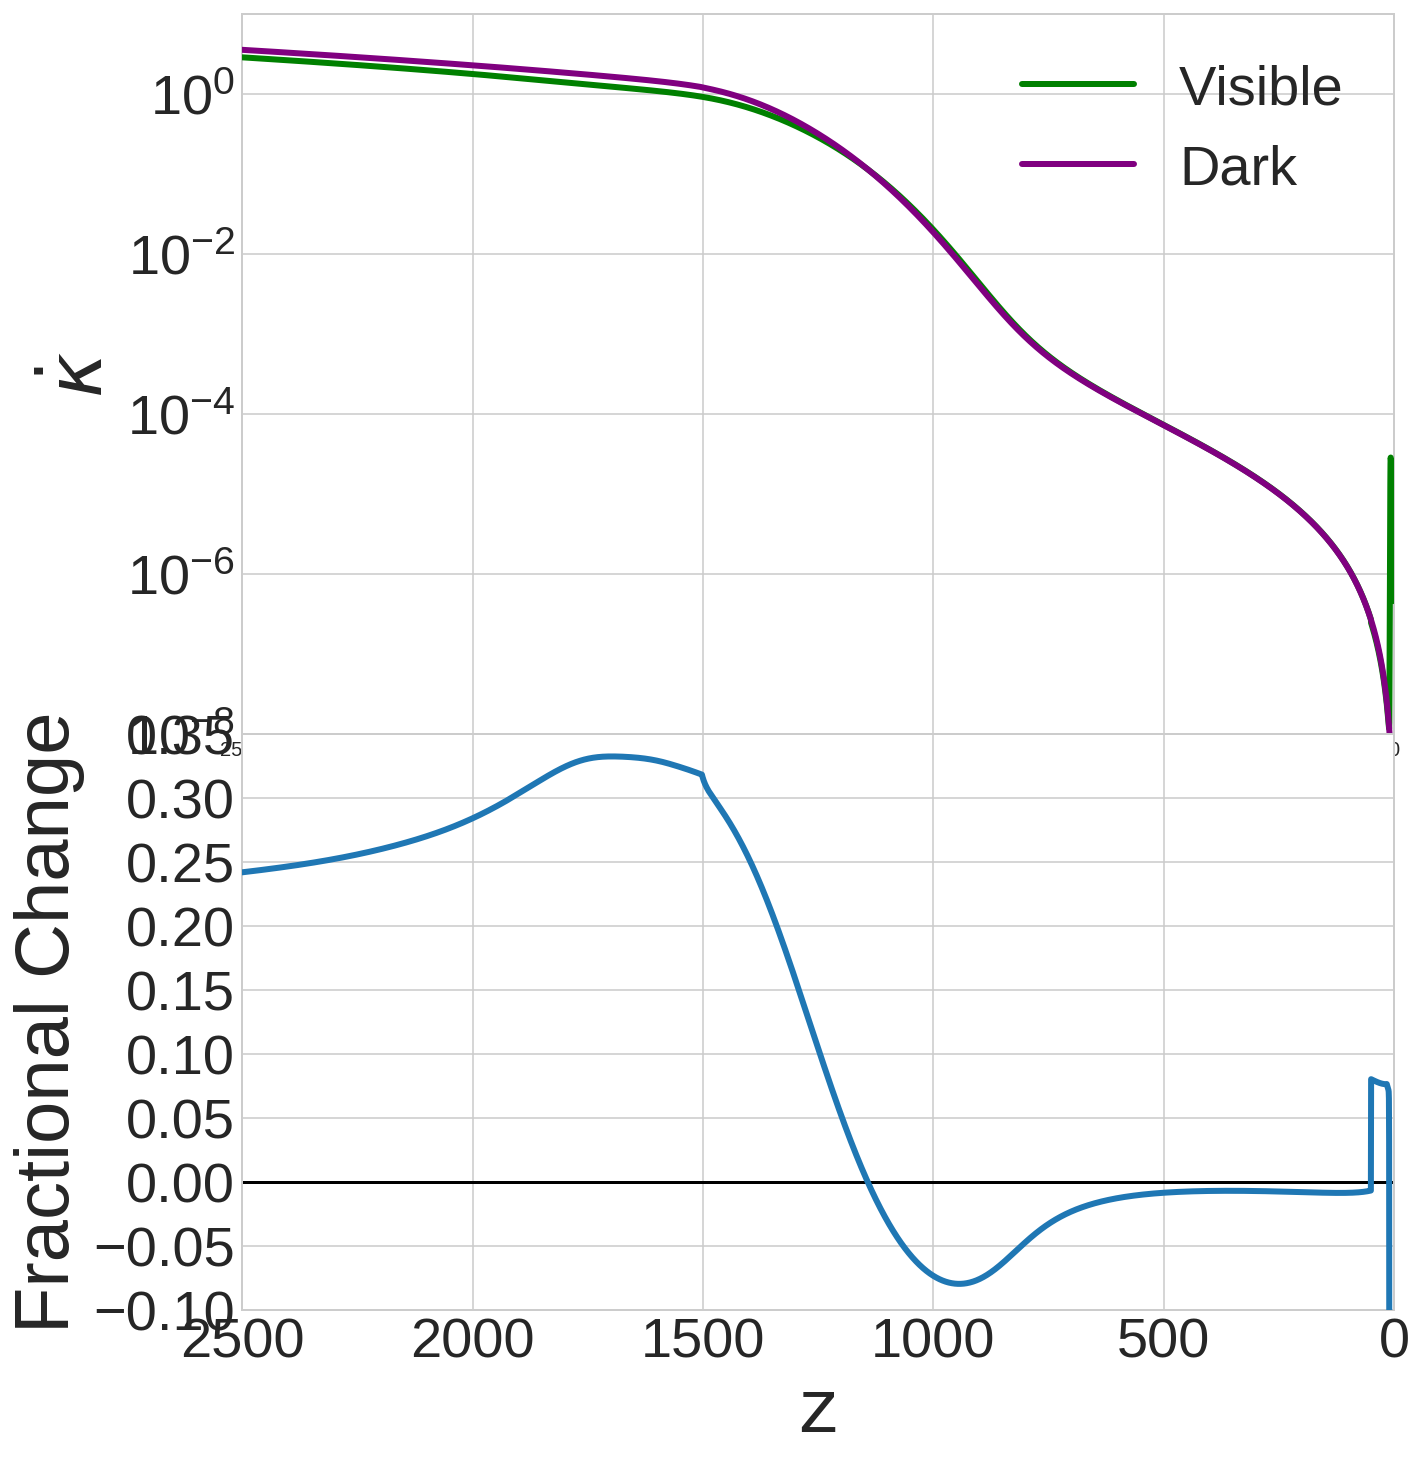

In [108]:
#x1 = FFAT_z
#y1 = FFAT_dark_kappa_dot
#y1 = FFAT_dmu_idm_dr
#x2 = FFAT_z
#x2 = FFAT_kappa_dot

x1 = FFAT_z
y1 = FFAT_kappa_dot
x2 = FFAT_z
y2 = FFAT_dark_kappa_dot

y2_interp = np.interp(LCDM_z,x2,y2)
#for i in range(len(FFAT_kappa_dot)):
#    y2_interp[i] = np.interp(LCDM_z[i],x2,y2)

y_res = (y2_interp-y1)/y1


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="green",zorder=10,linewidth=3)
plt.plot(x2,y2,color="purple",zorder=10,linewidth=3)
plt.xlim(2500,0)
plt.ylim(1e-8,1e1)


#plt.xscale("log")
plt.yscale("log")


plt.grid(True)
#frame1.set_xticklabels([]) 
#grid()

plt.yticks(fontsize= 28)
plt.ylabel(r"$\dot{\kappa}$",fontsize=38)

plt.legend(['Visible','Dark'],loc = "upper right", fontsize=28)


#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        

plt.grid(True)
#grid()
plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.xticks(fontsize= 28)
#plt.axvline(x=FCV_z[item_index],color='blue')
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
#plt.yscale("log")
plt.xlim(2500,0)
plt.ylim(-.1,.35)
plt.ylabel("Fractional Change",fontsize=38)
plt.axhline(0,color='black')
#plt.axhline(.087537,color='black',linestyle='dotted',linewidth=5)




fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('tffat_X_e.pdf', dpi=800,bbox_inches='tight')  
plt.show()



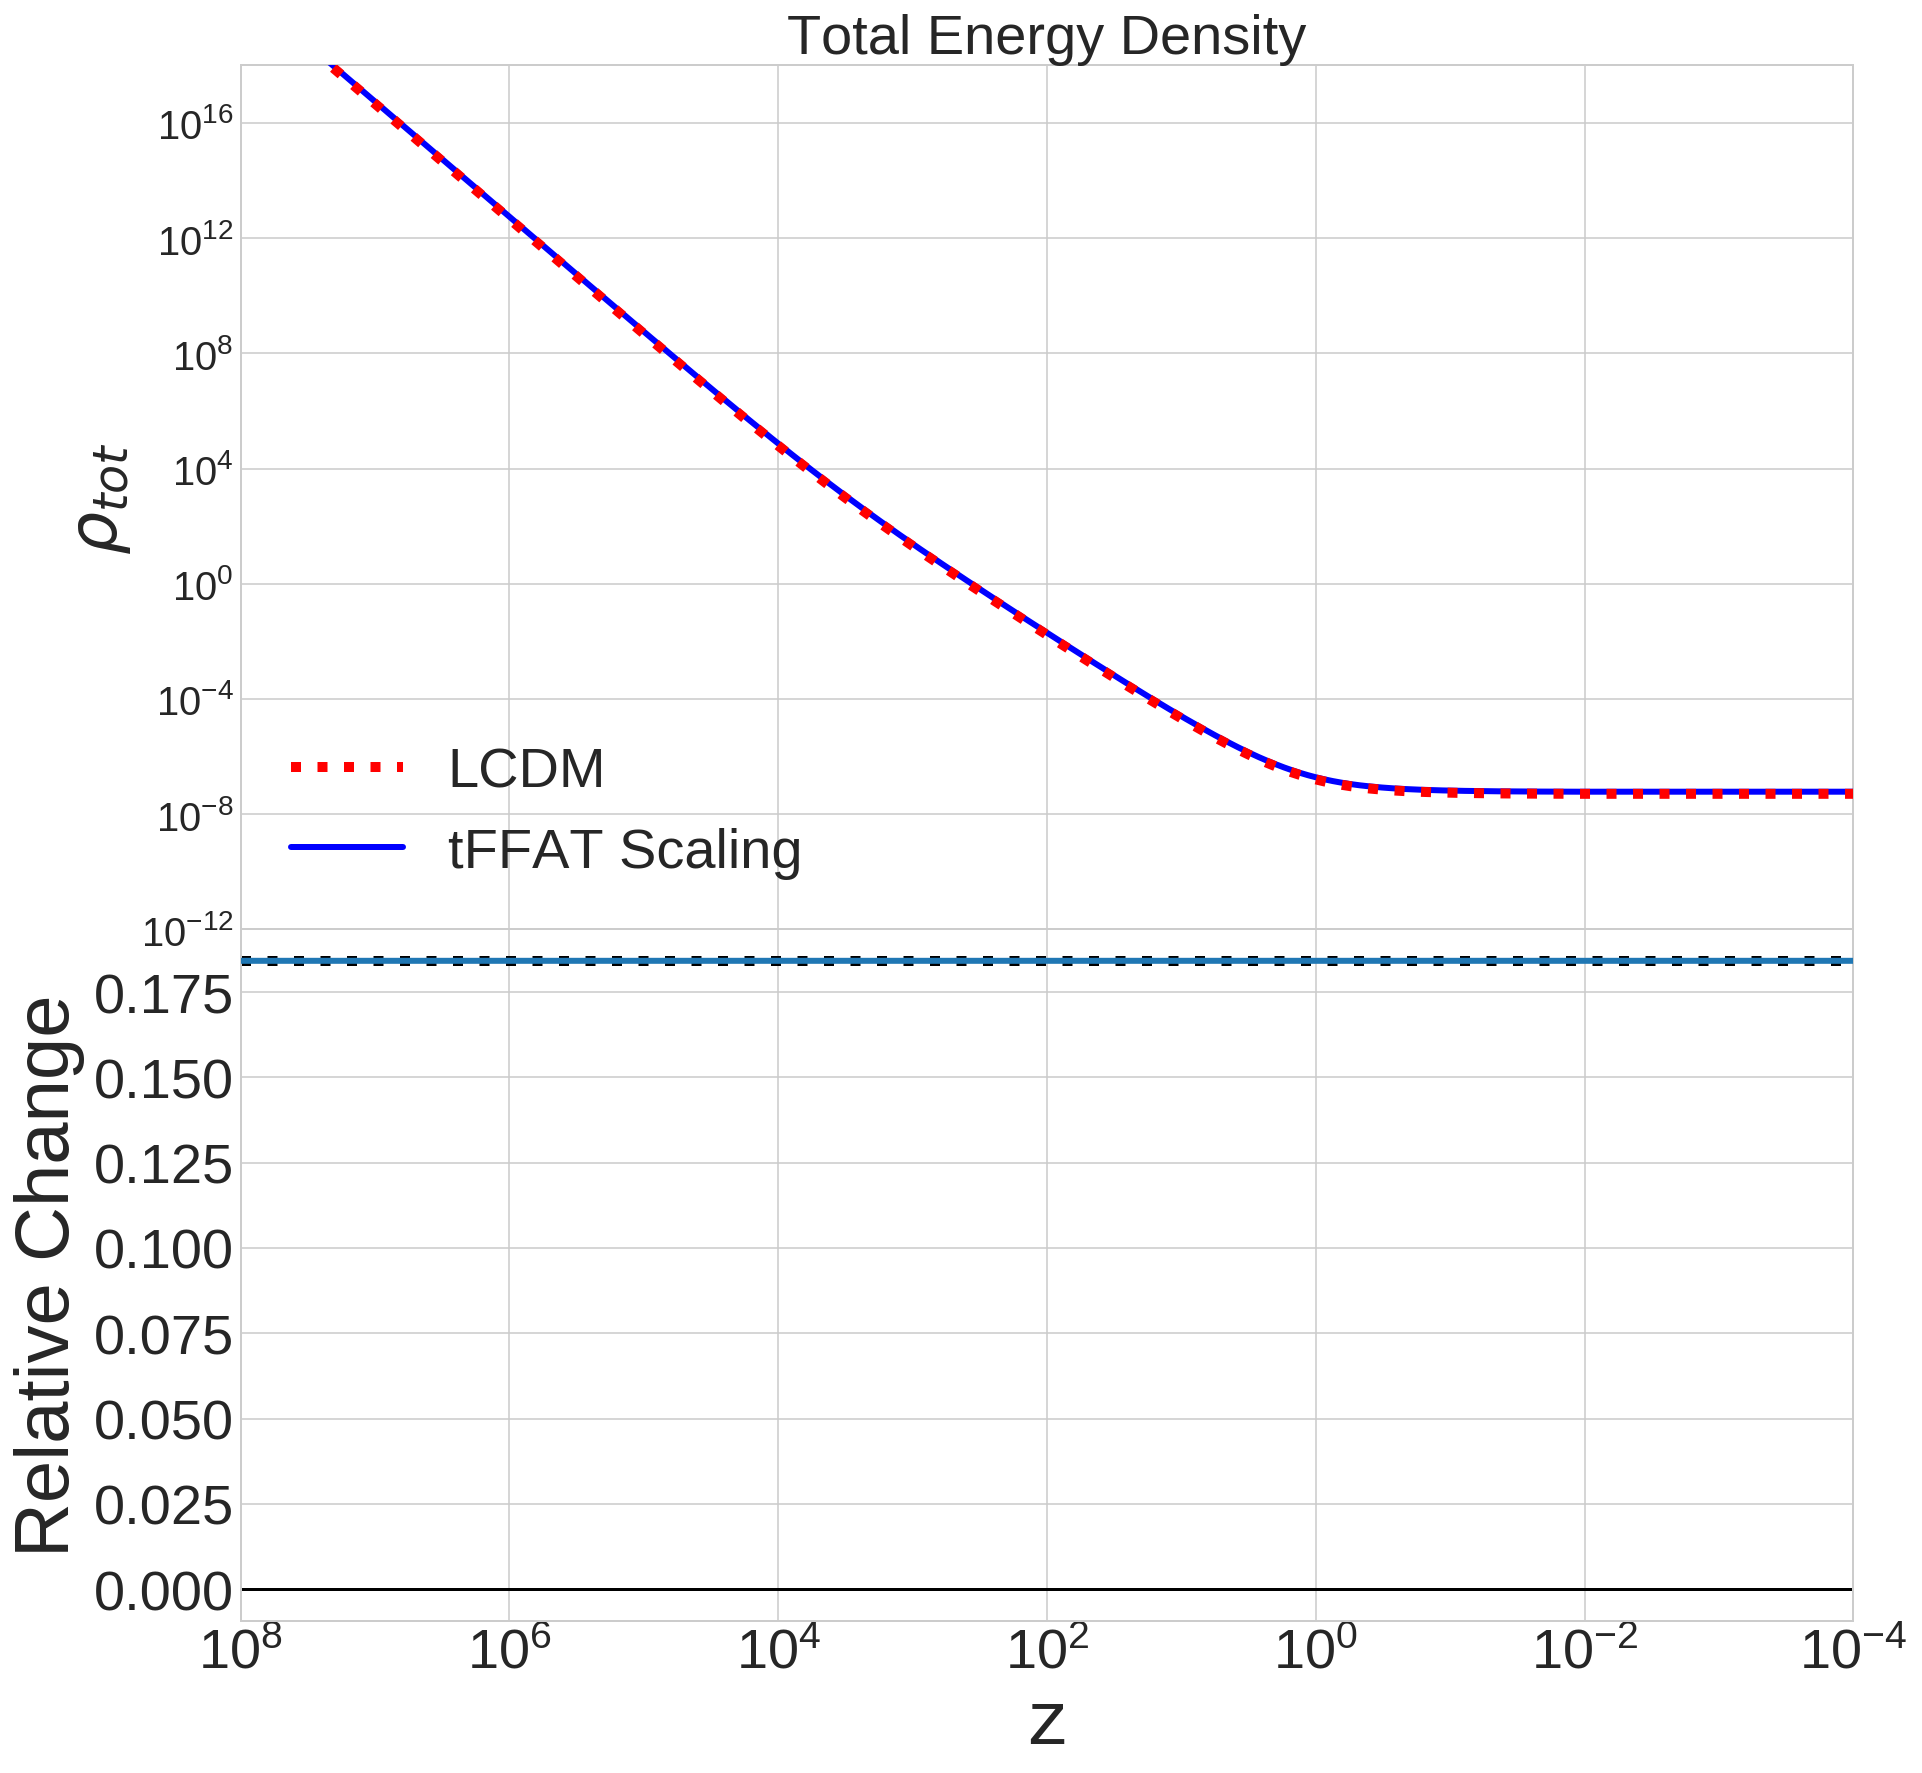

In [109]:
x1 = LCDM_z_back
y1 = LCDM_rho_tot
x2 = FFAT_z_back
y2 = FFAT_rho_tot #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\rho_{tot}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Total Energy Density', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.18414,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



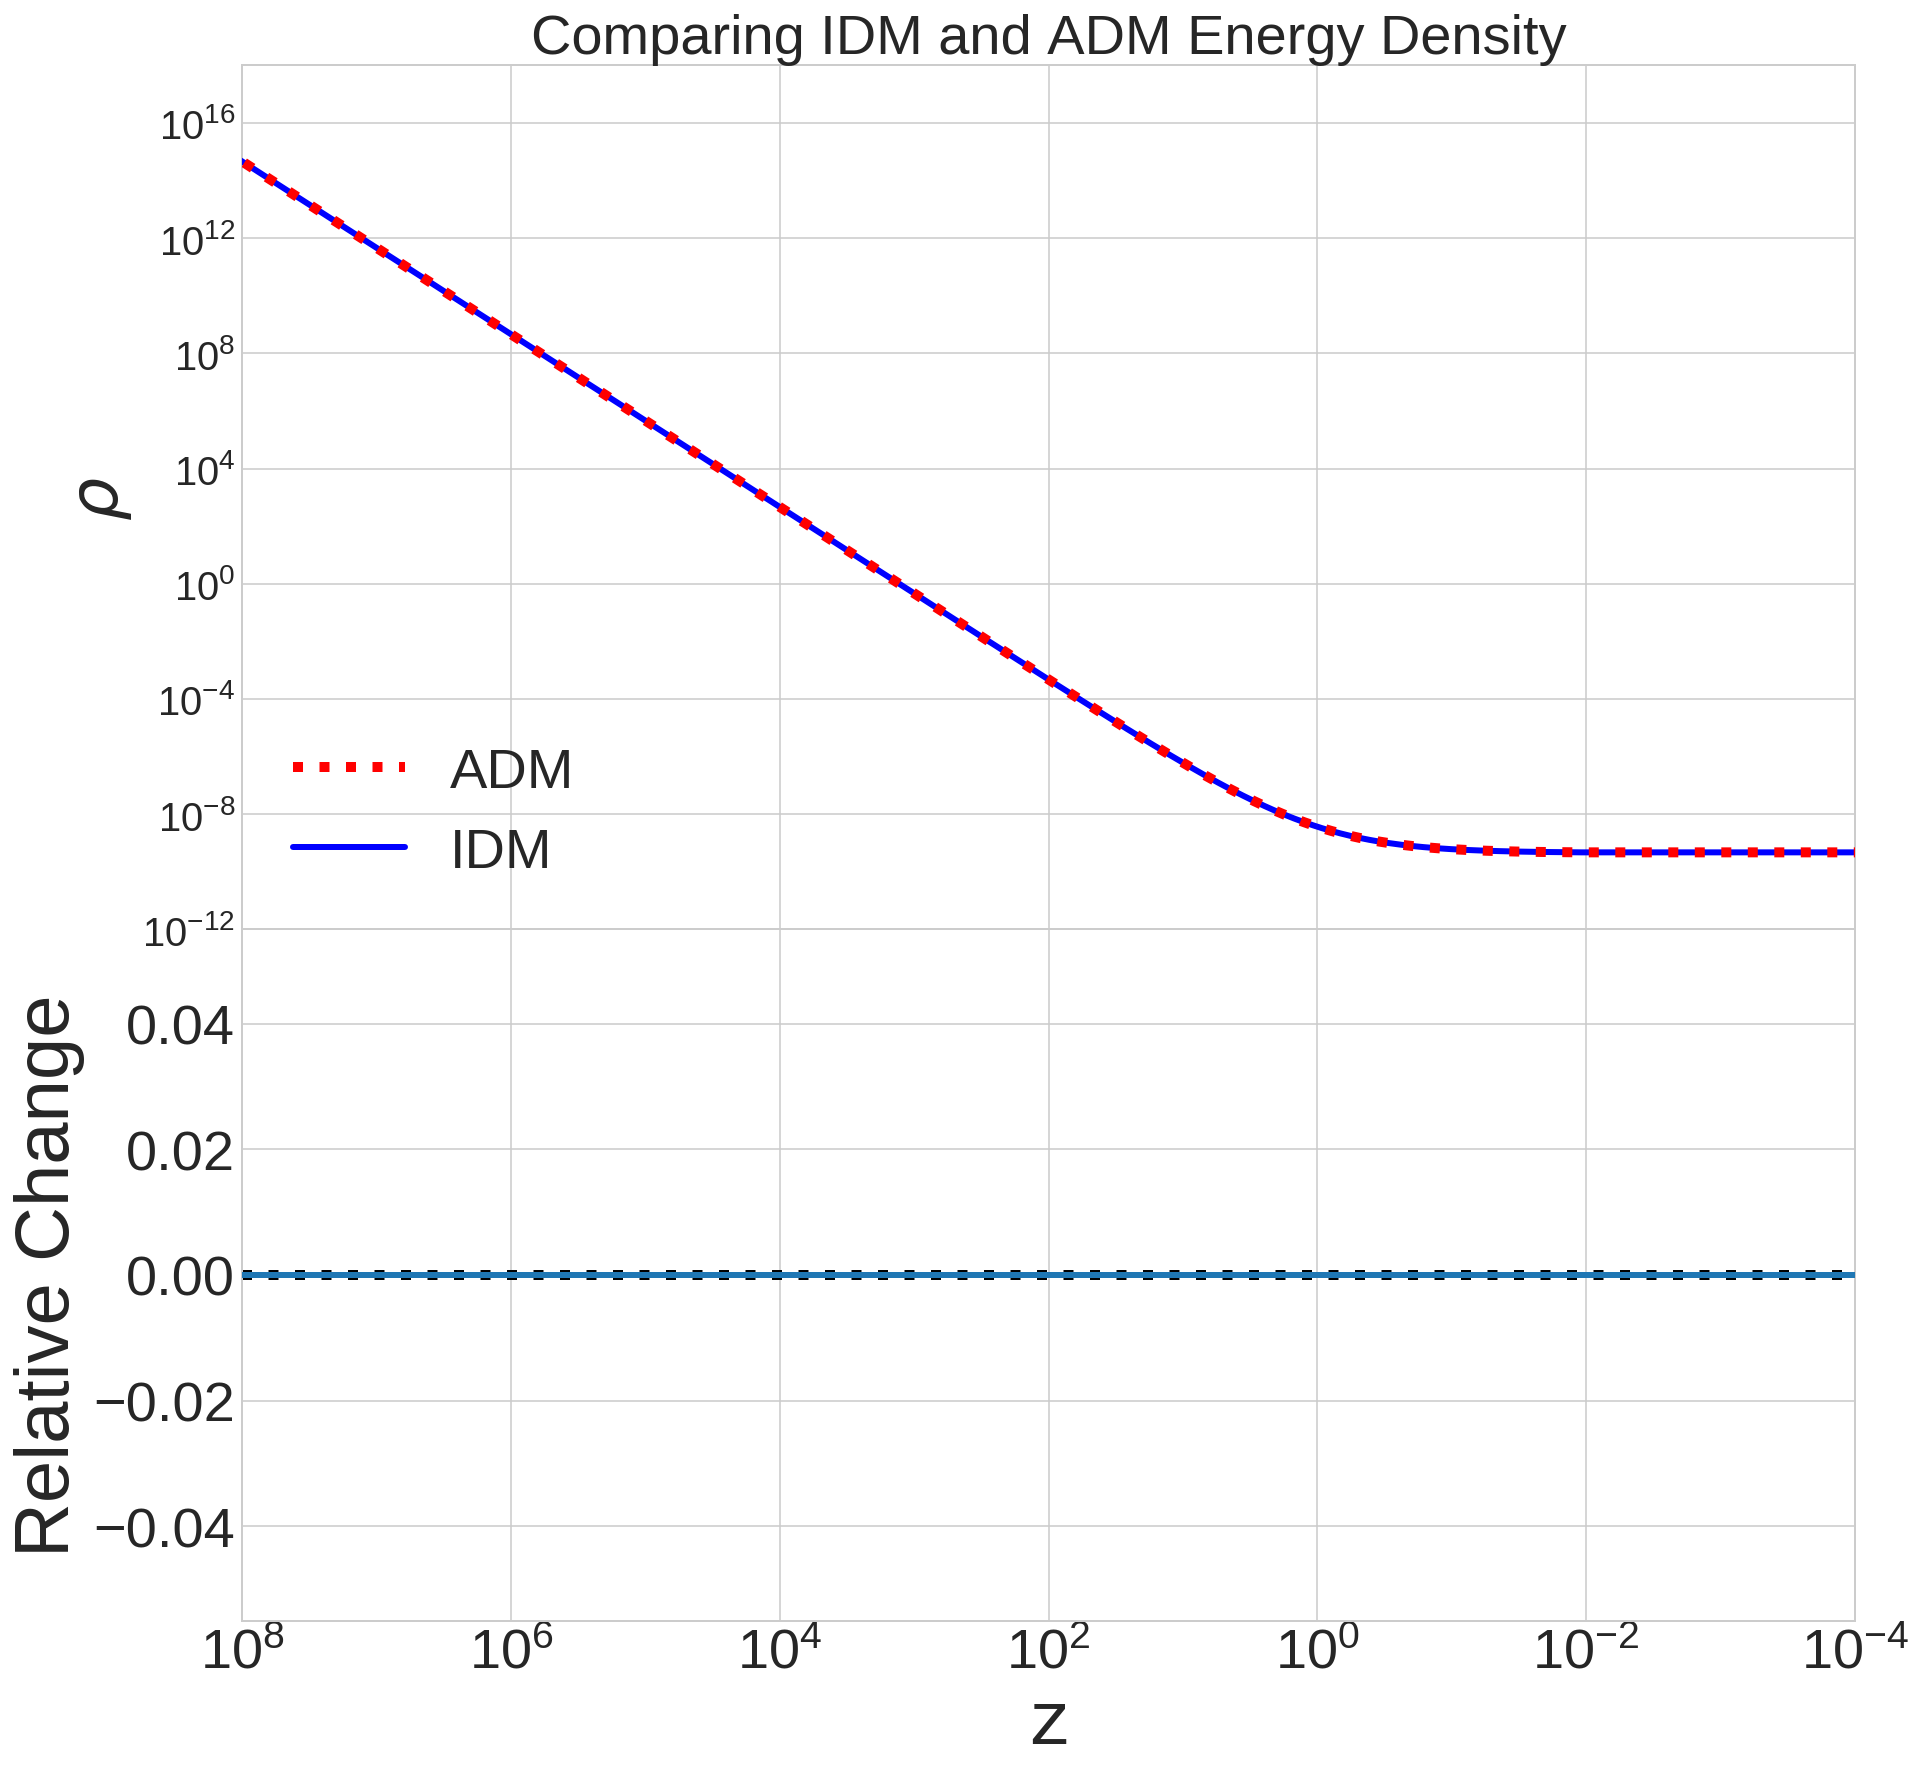

In [110]:
x1 = FFAT_z_back
y1 = FFAT_rho_adm
x2 = FFAT_z_back
y2 = FFAT_rho_idm #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['ADM','IDM'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\rho$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Comparing IDM and ADM Energy Density', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



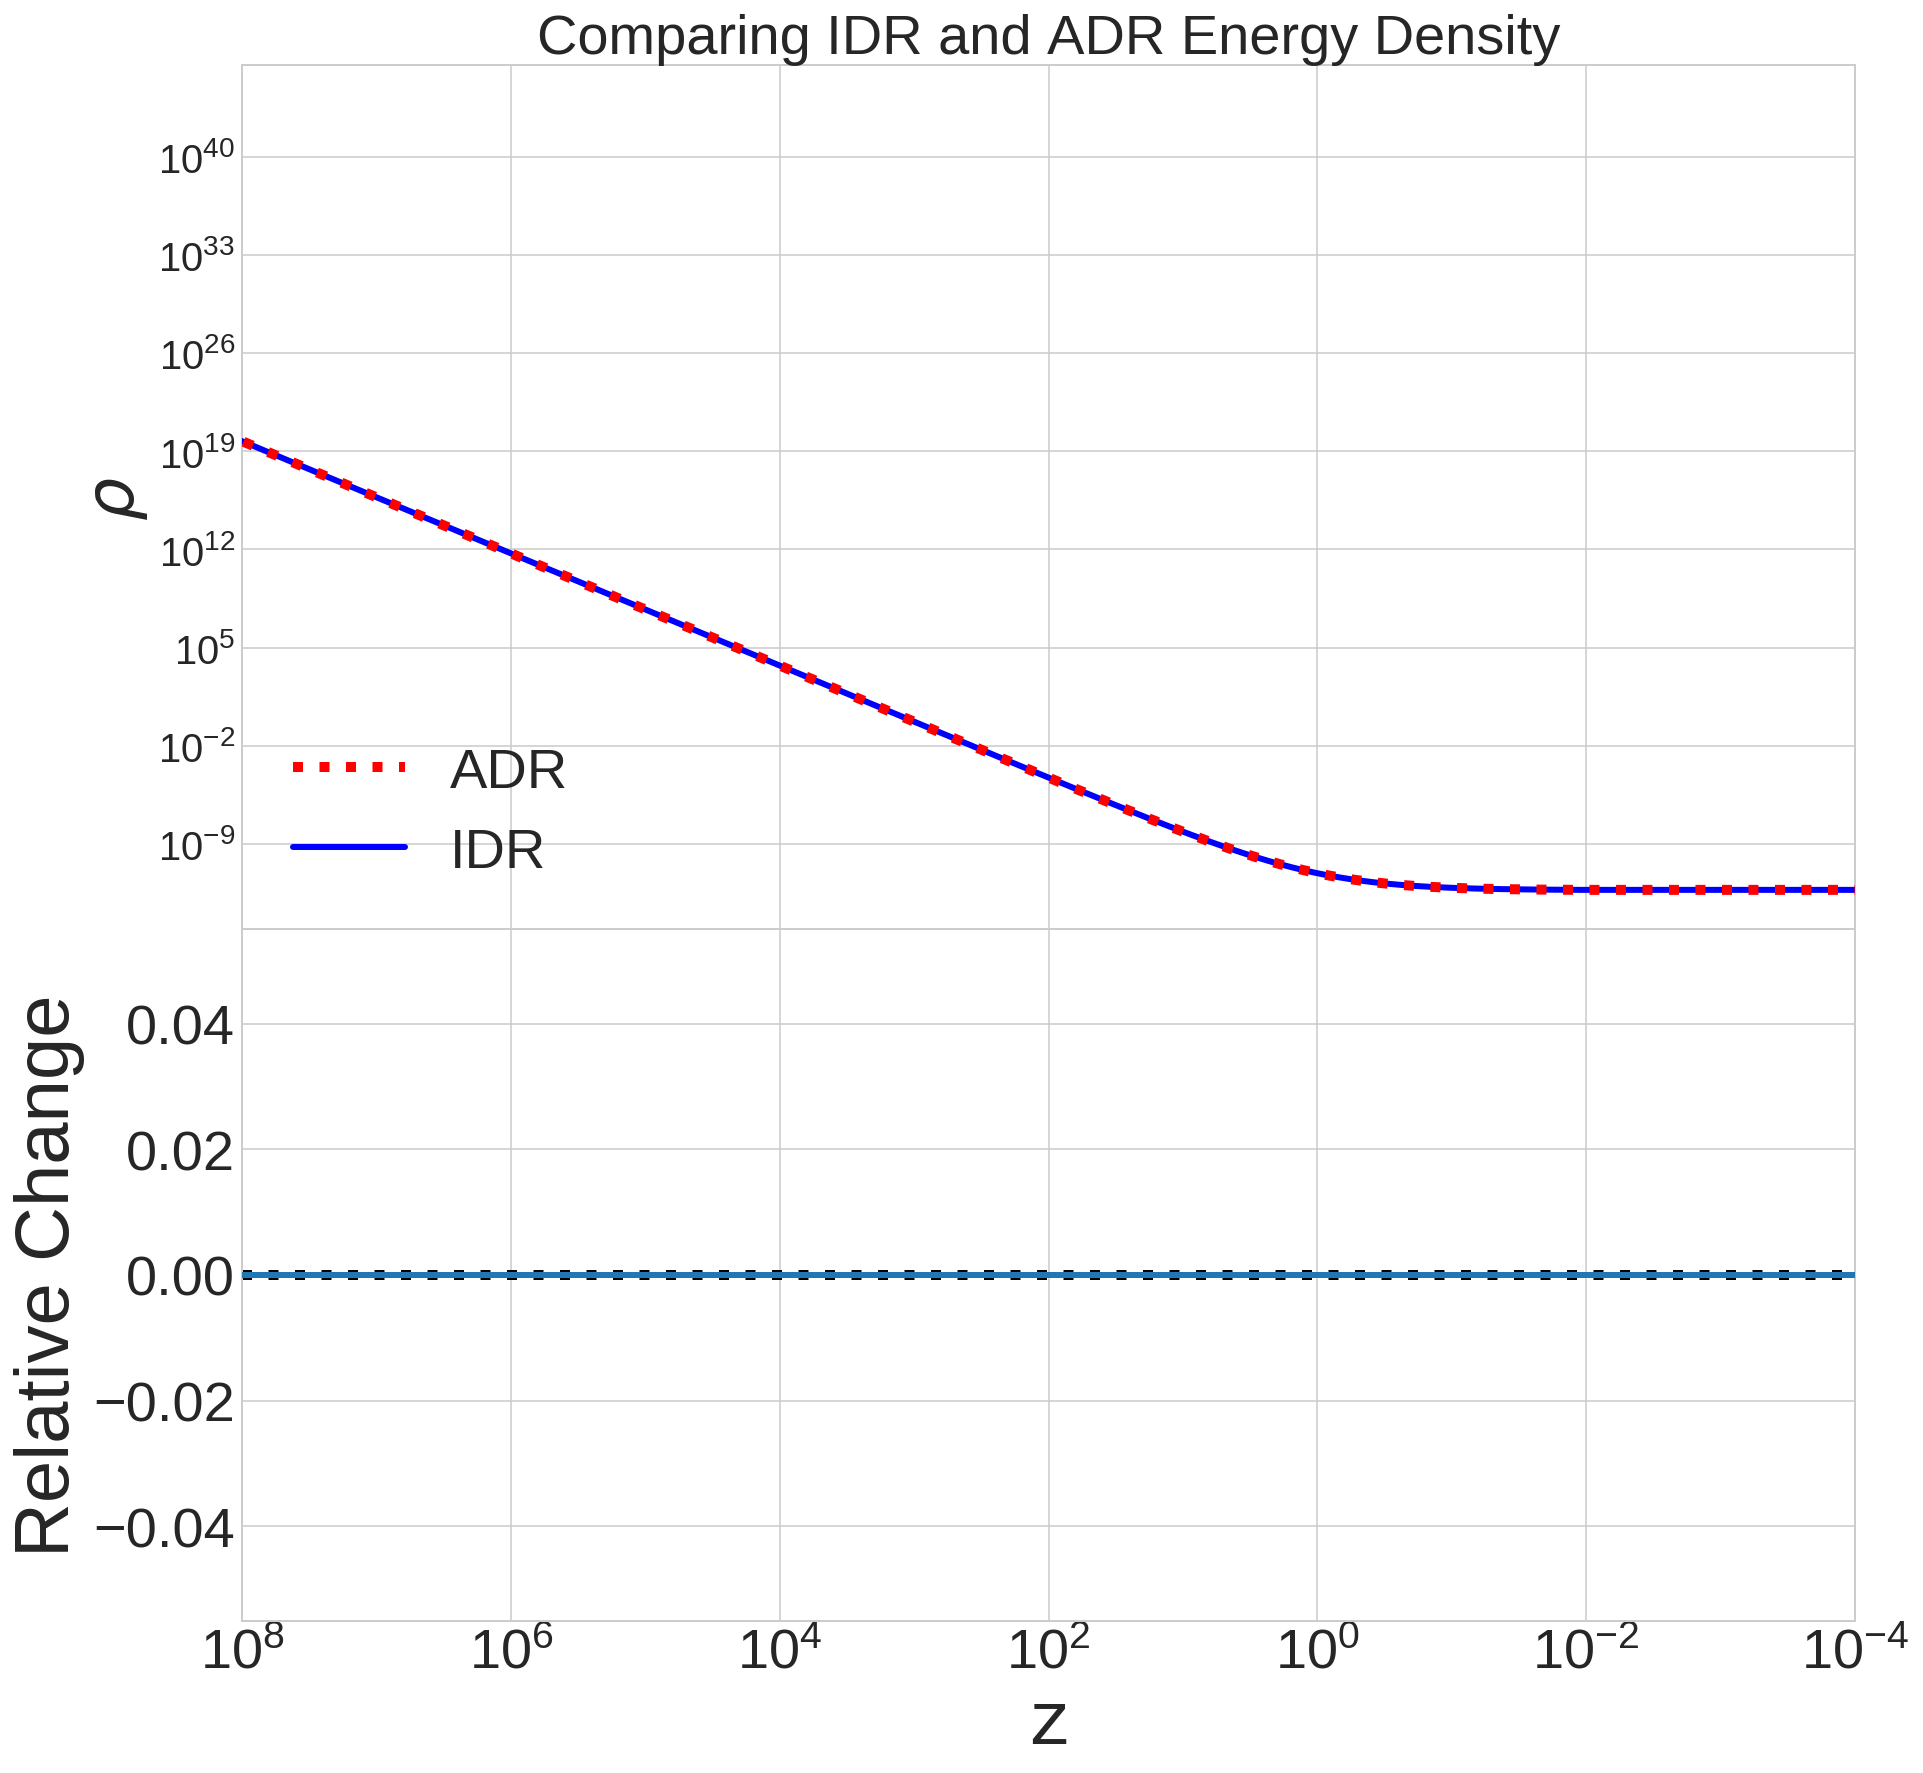

In [111]:
x1 = FFAT_z_back
y1 = FFAT_rho_adr
x2 = FFAT_z_back
y2 = FFAT_rho_idr #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
#plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['ADR','IDR'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\rho$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Comparing IDR and ADR Energy Density', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



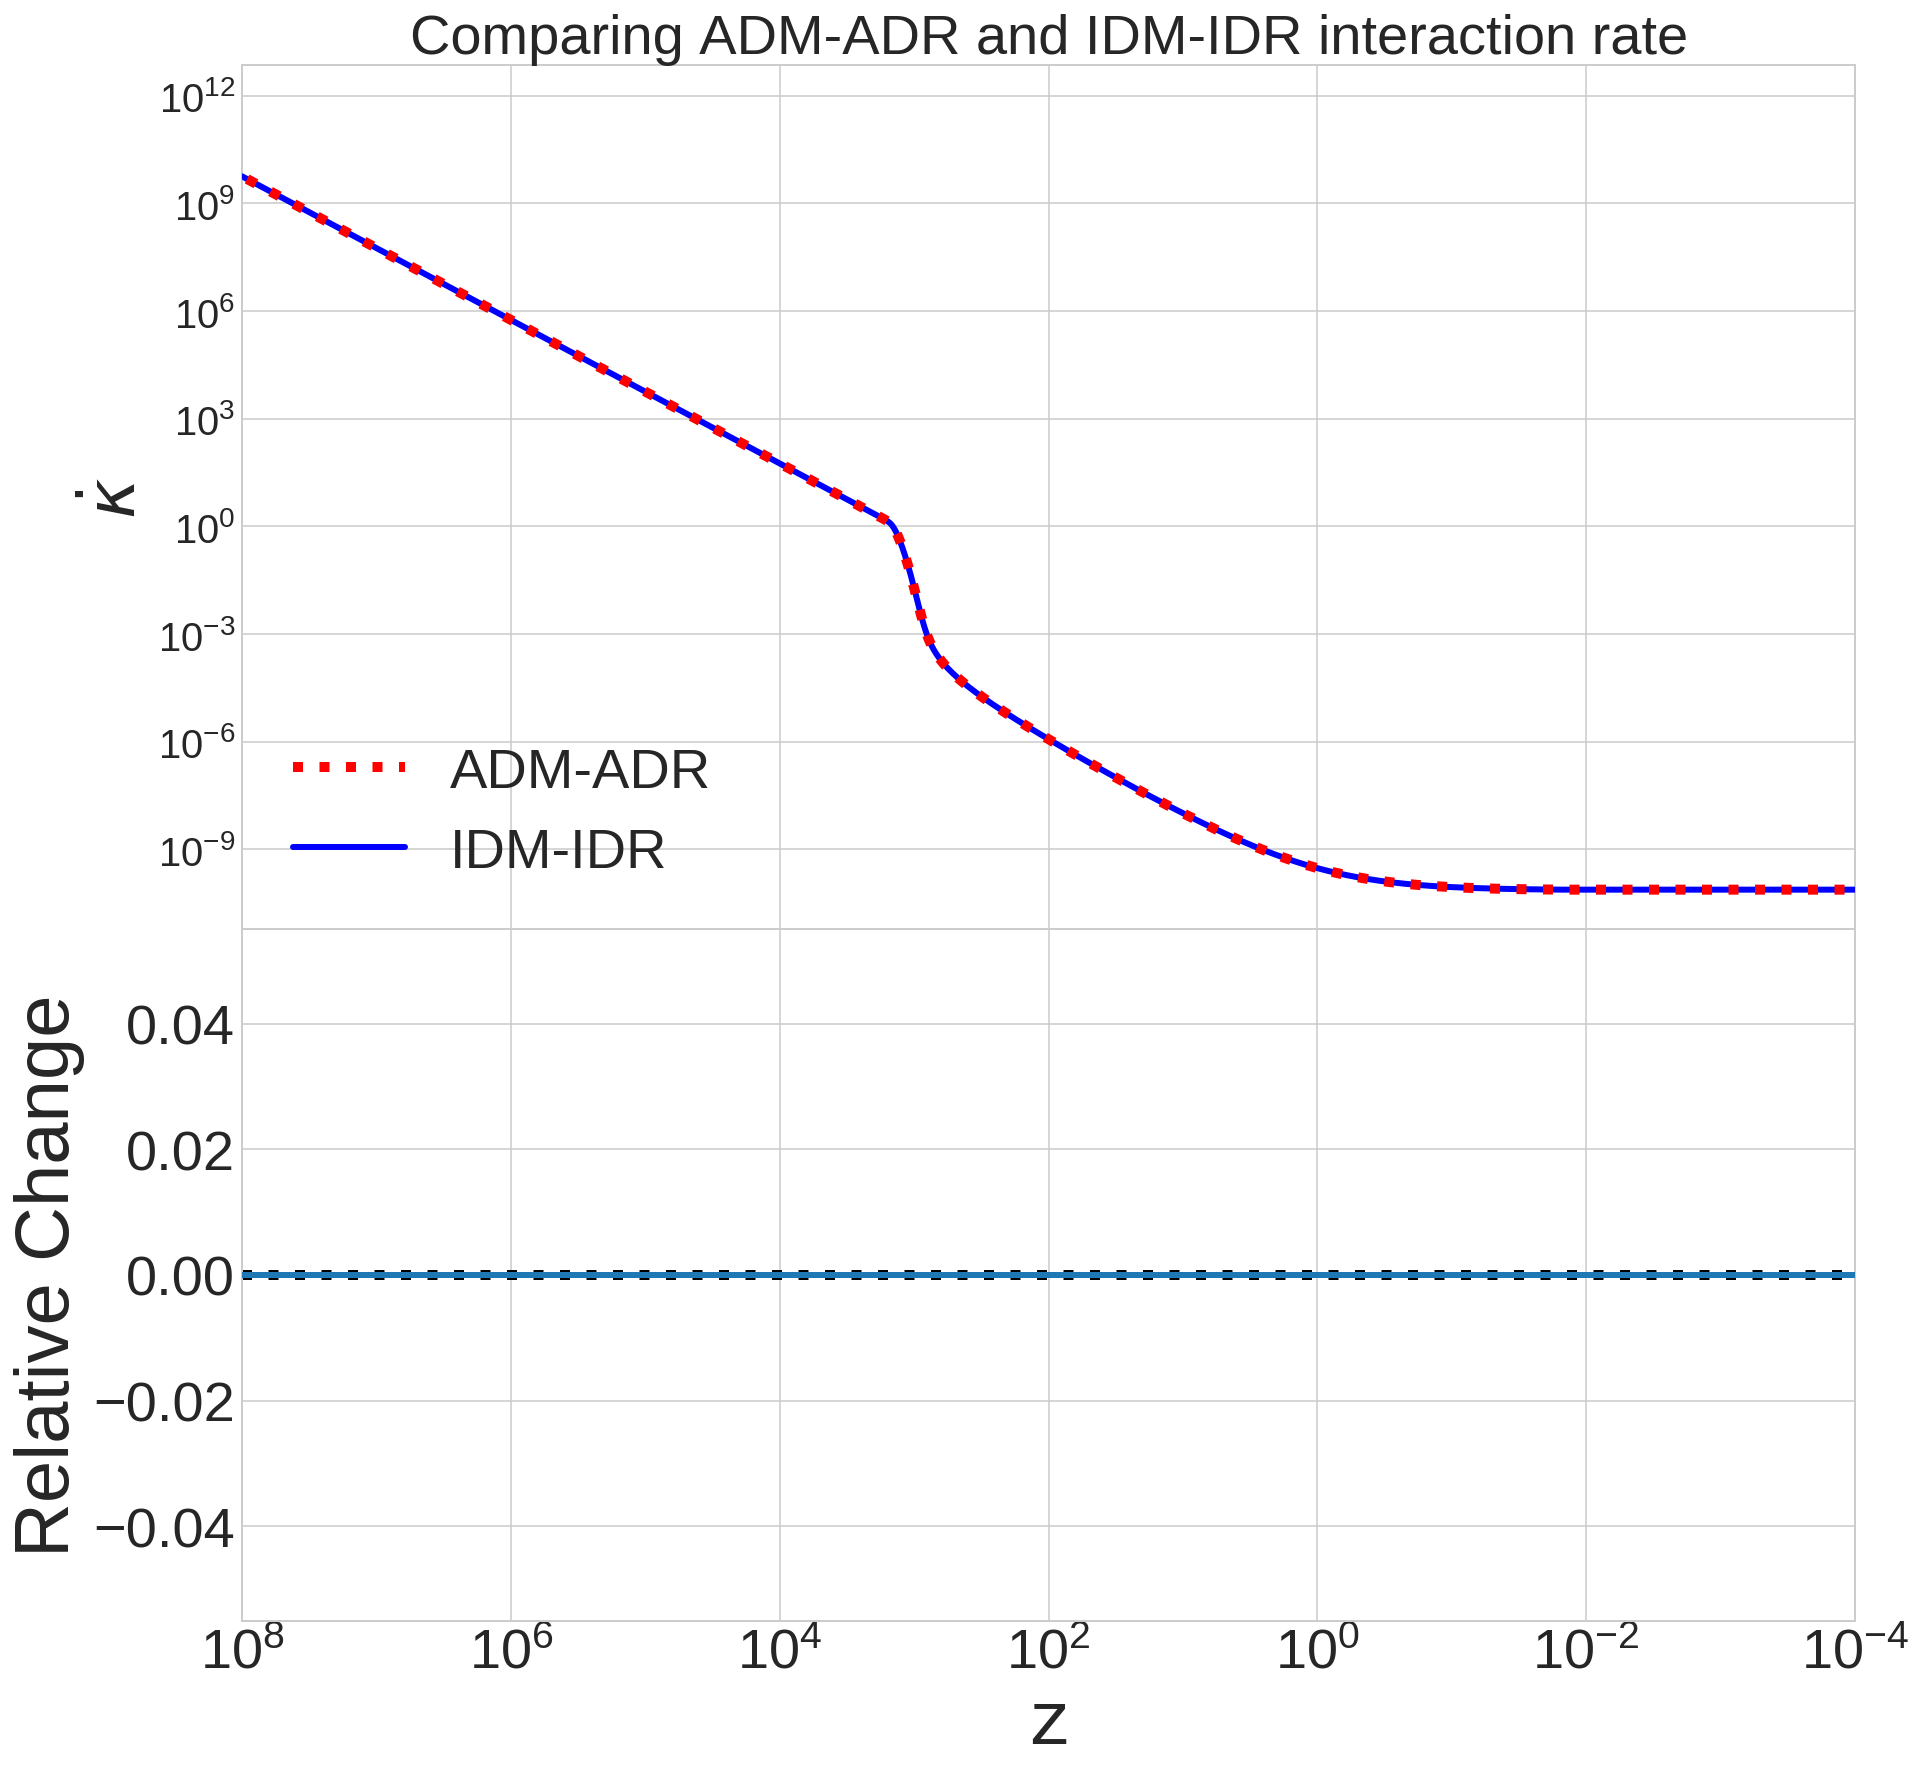

In [112]:
x1 = FFAT_z
y1 = FFAT_dark_kappa_dot
x2 = FFAT_z
y2 = FFAT_dmu_idm_dr #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
#plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend(['ADM-ADR','IDM-IDR'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\dot{\kappa}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Comparing ADM-ADR and IDM-IDR interaction rate', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



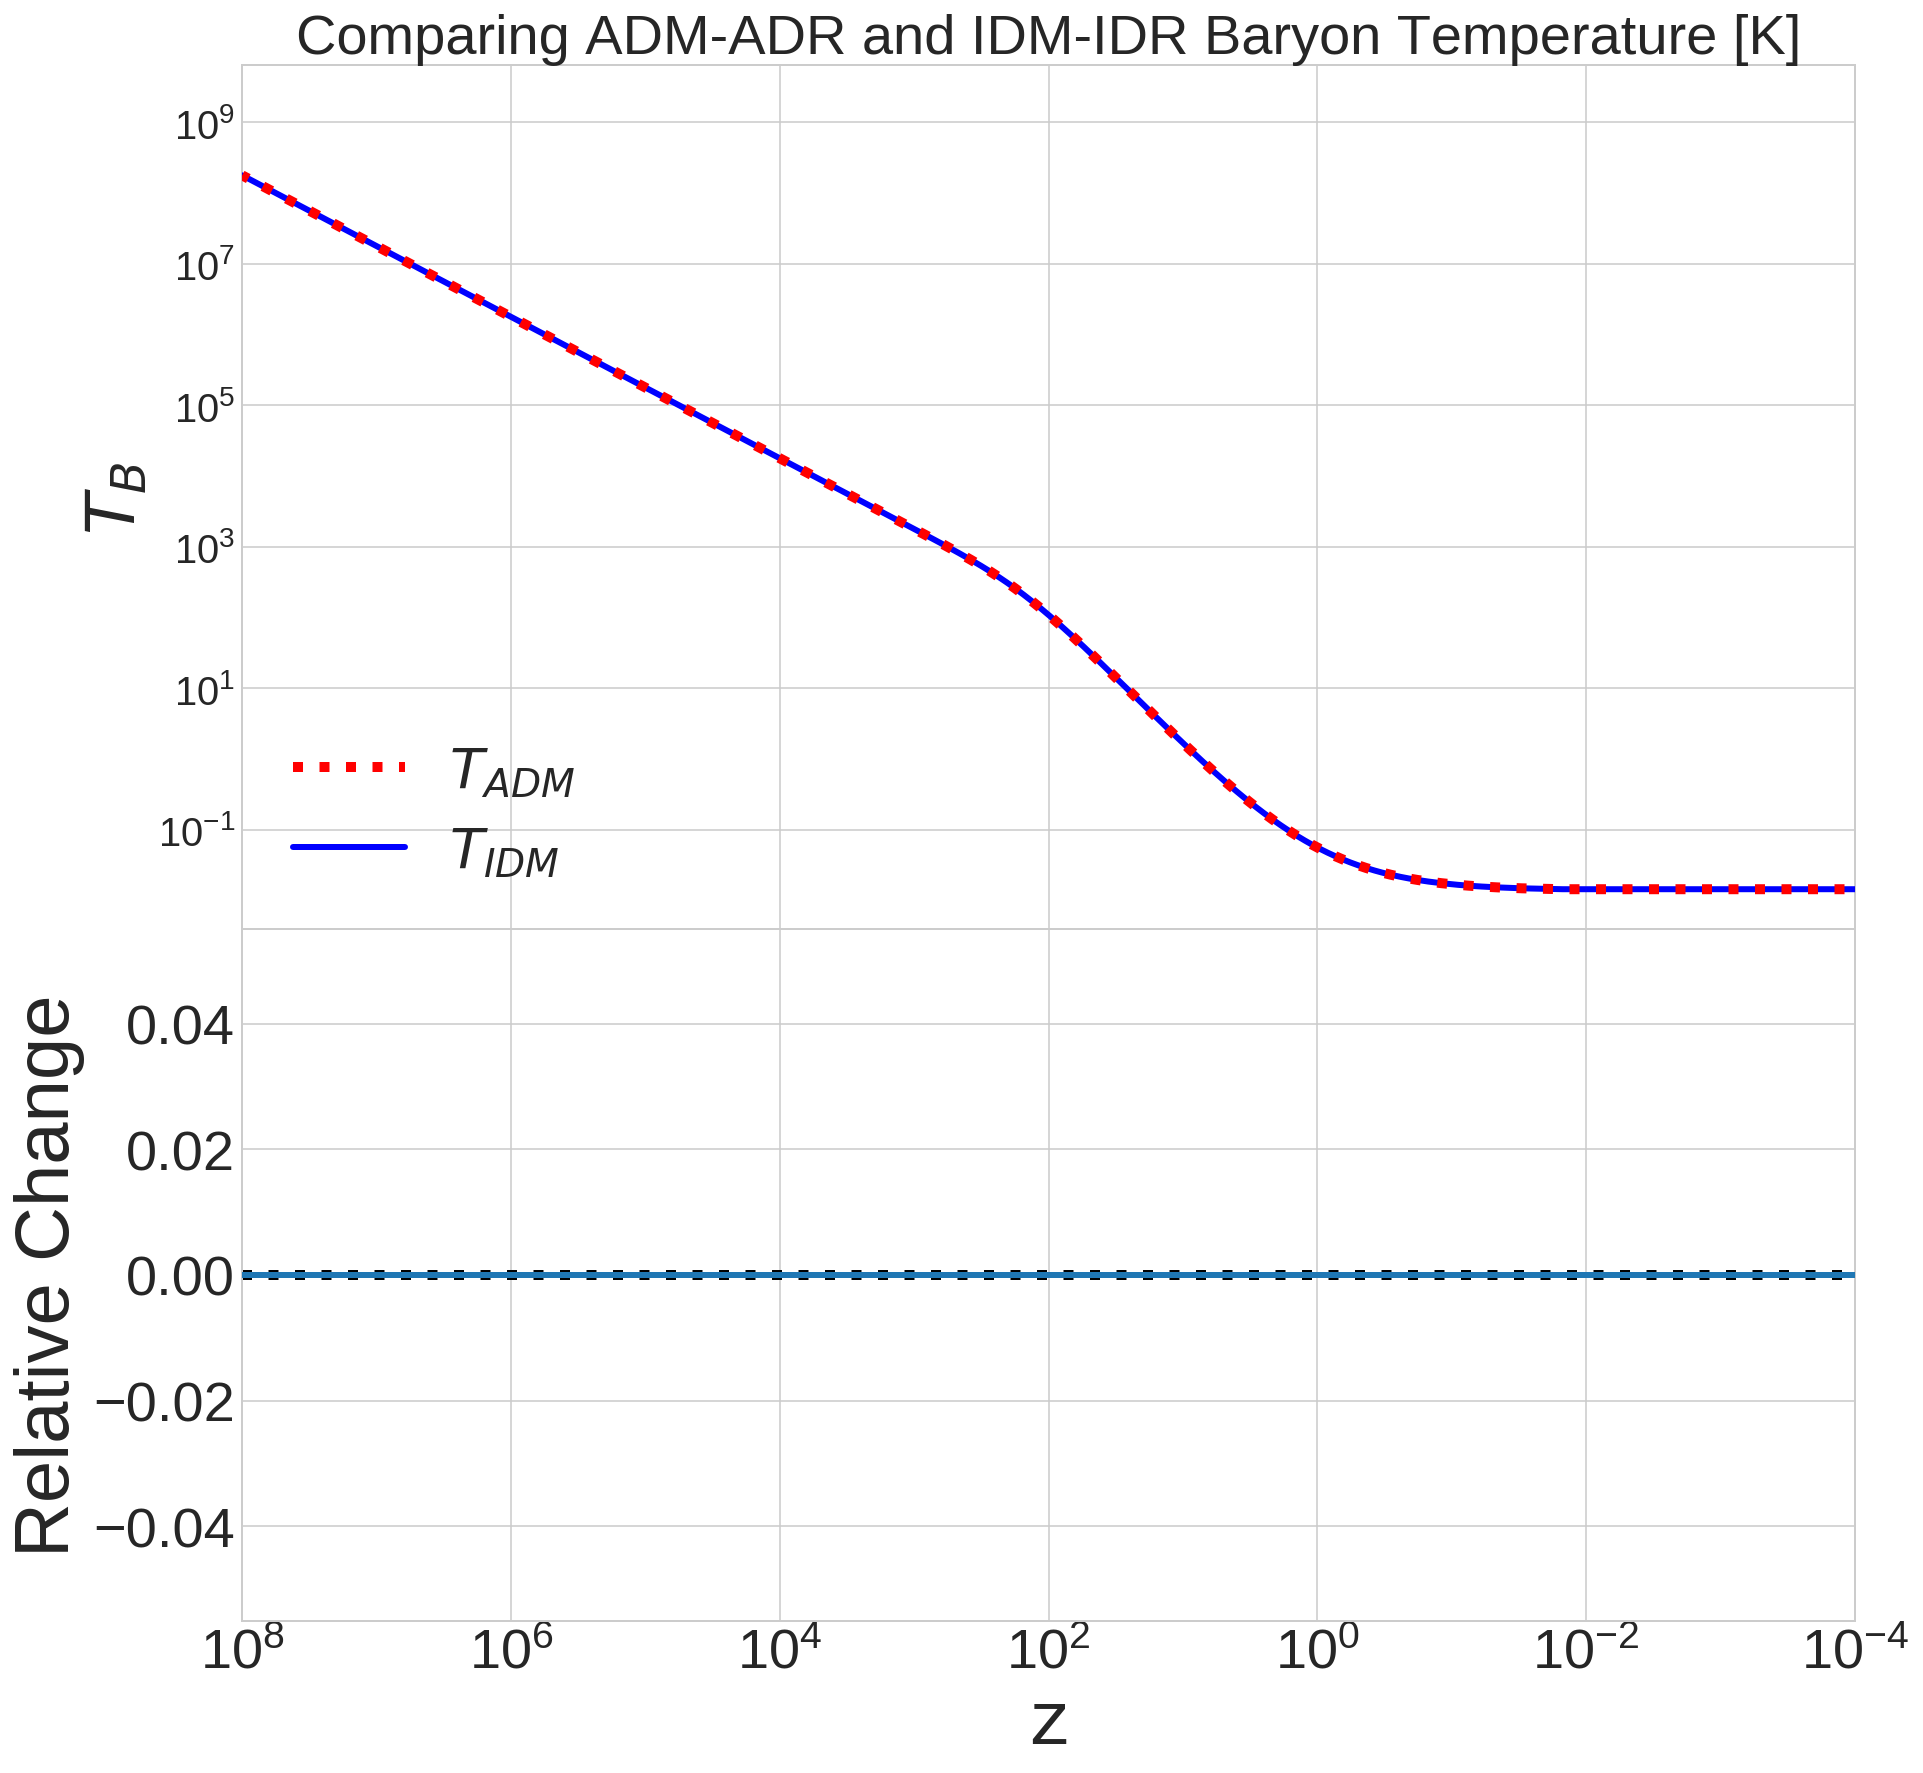

In [113]:
x1 = FFAT_z
y1 = FFAT_T_adm
x2 = FFAT_z
y2 = FFAT_T_idm #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
#plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend([r'$T_{ADM}$',r'$T_{IDM}$'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$T_{B}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Comparing ADM-ADR and IDM-IDR Baryon Temperature [K]', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()



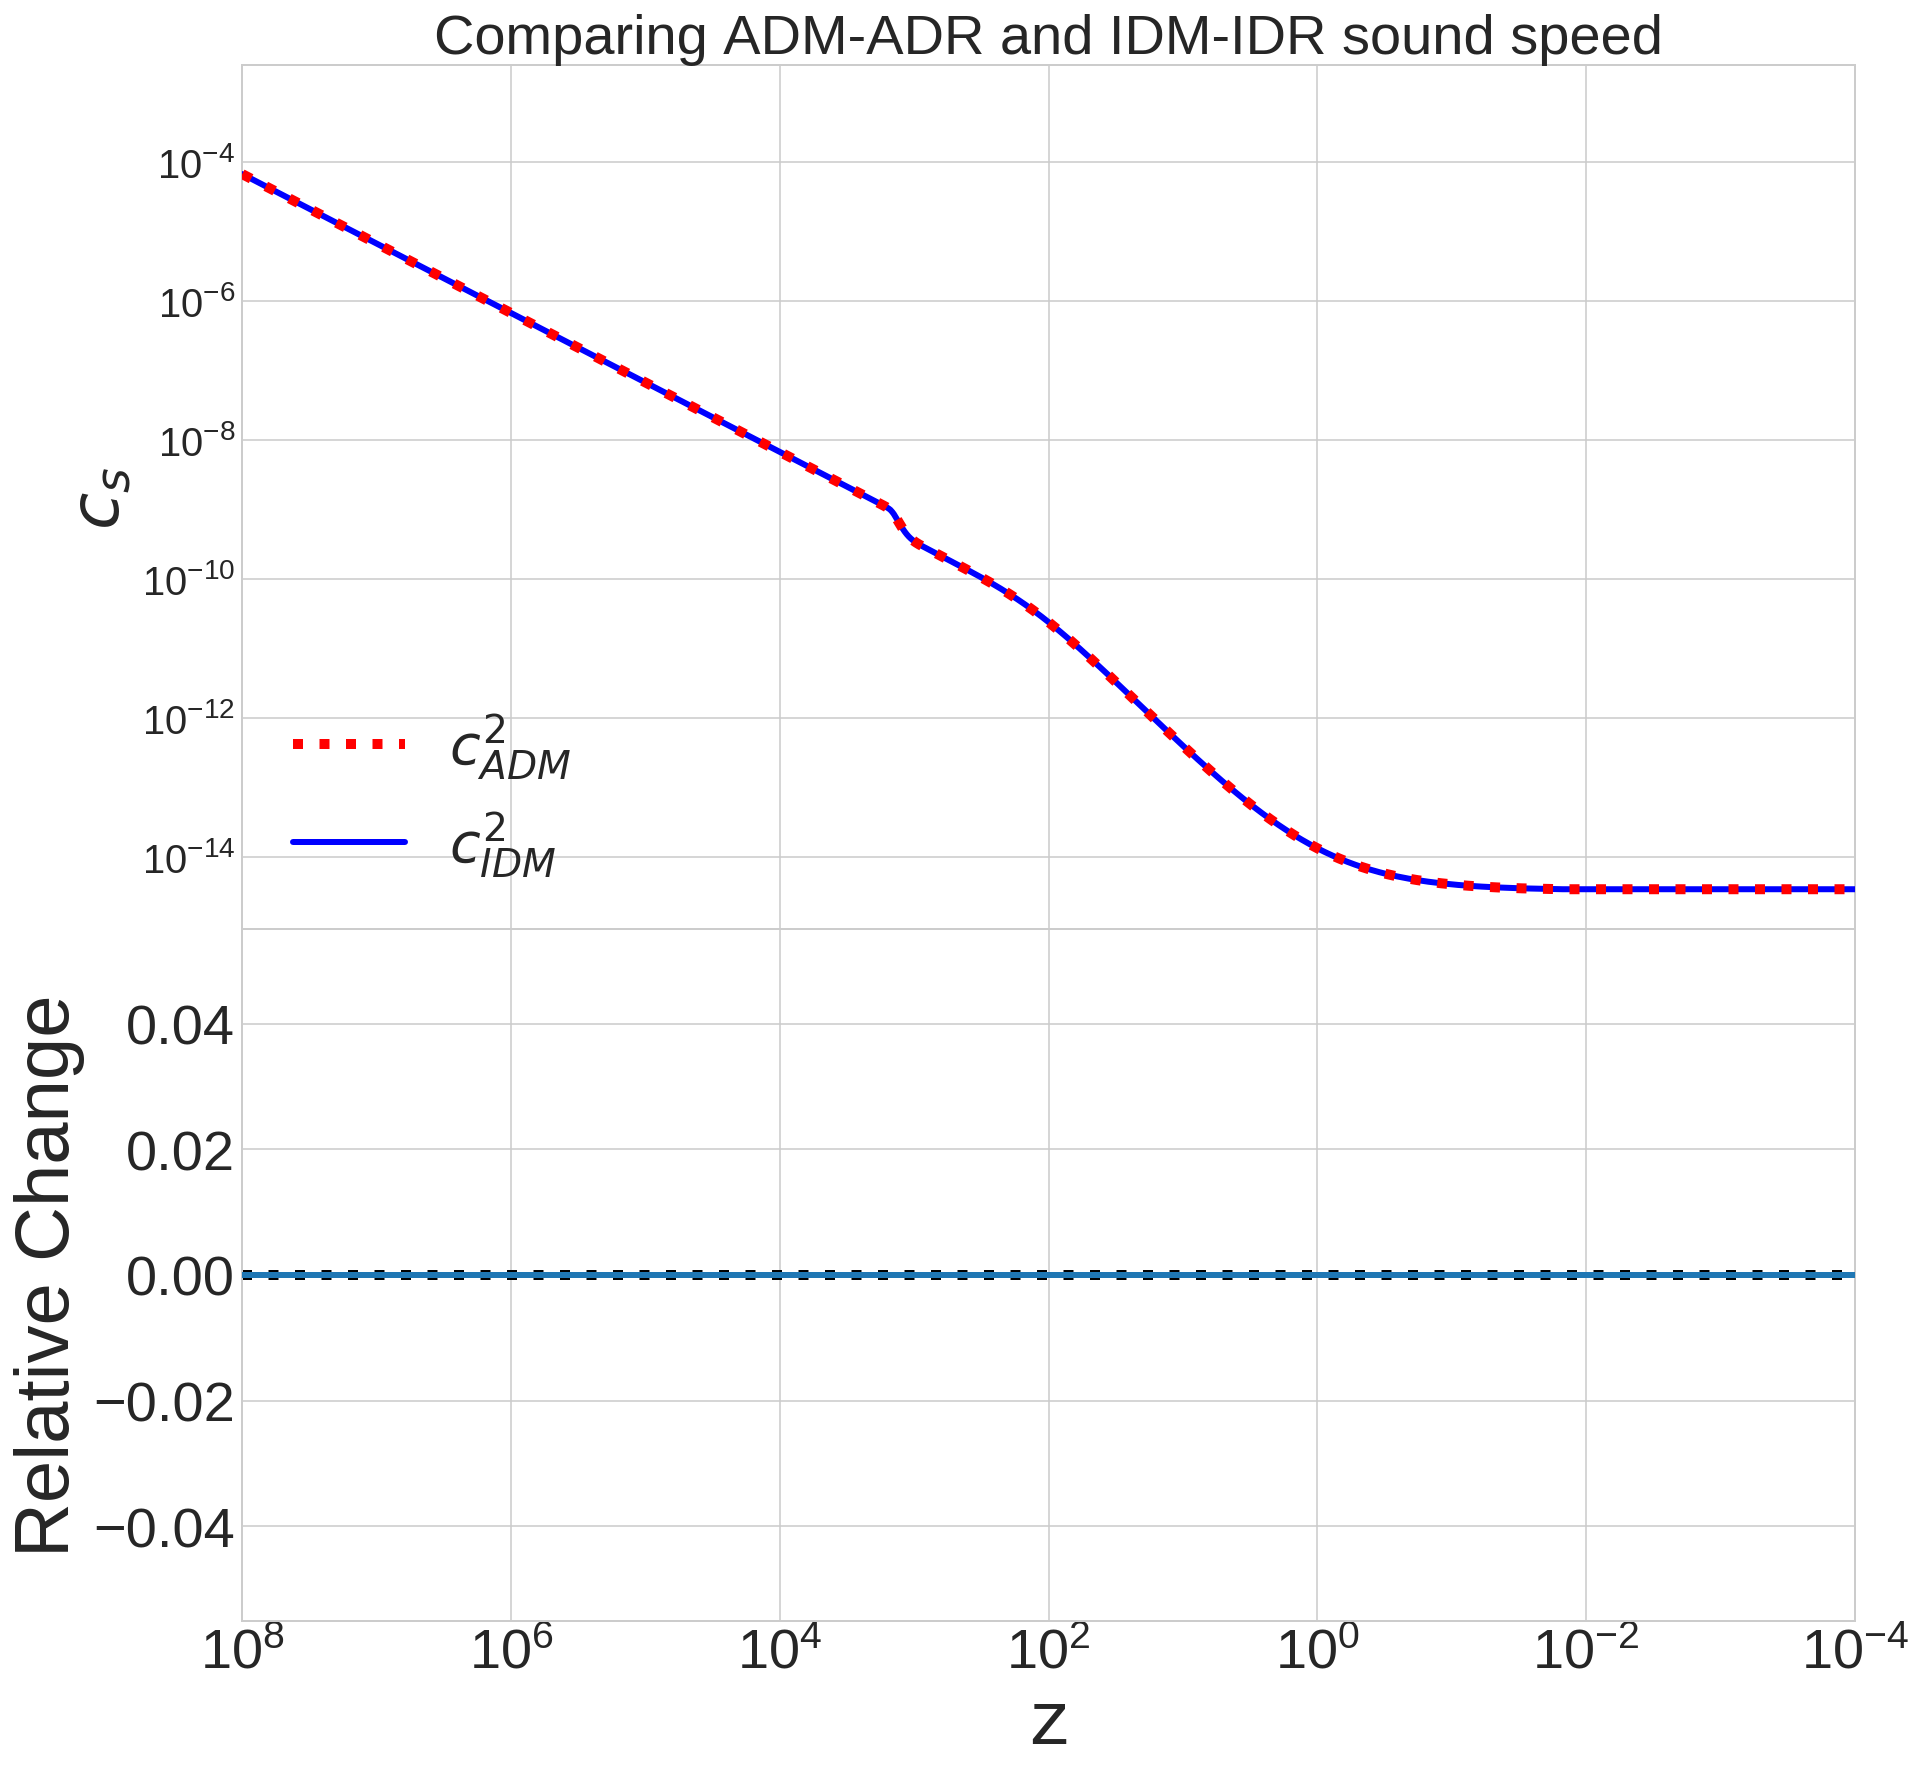

In [116]:
x1 = FFAT_z
y1 = FFAT_dark_cb2
x2 = FFAT_z
y2 = FFAT_c_idm #+ FFAT_rho_adm
y_res = (y2/y1)-1

fig1 = figure(1)


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=10,linestyle='dotted',linewidth=5)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e8, 1e-4)
#plt.ylim(1e-12,1e18)

plt.grid(True)
frame1.set_xticklabels([])
plt.yticks(fontsize= 28)
plt.legend([r'$c^2_{ADM}$',r'$c^2_{IDM}$'],loc = 3, fontsize=28)
plt.xlabel("z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$c_{s}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title('Comparing ADM-ADR and IDM-IDR sound speed', fontsize=28)



#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.4))        
plt.plot(x1, y_res, zorder = 10,linewidth = 3)
plt.xscale("log")
plt.xlim(1e8, 1e-4)
plt.axhline(0,color='black')
plt.axhline(0.,color='black',linestyle='dotted',linewidth=5)

plt.grid(True)

plt.xlabel("z",fontsize=38)
plt.yticks(fontsize= 28)
plt.ylabel("Relative Change",fontsize=38)
plt.xticks(fontsize= 28)



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('tffat_rho_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()

